# Kings County Housing Prices Bakeoff


## Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 50, 'display.max_rows', 200)

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
# df = pd.read_csv("kc_house_data_train.csv")
city_df = pd.read_csv("with_cities.csv")
# print(df.shape)
print(city_df.shape)
city_df.head()

(17290, 25)


Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  2591820310  20141006T000000   365000.0         4       2.25   
1           1  7974200820  20140821T000000   865000.0         5       3.00   
2           2  7701450110  20140815T000000  1038000.0         4       2.50   
3           3  9522300010  20150331T000000  1490000.0         3       3.50   
4           4  9510861140  20140714T000000   711000.0         3       2.50   

   sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         2070      8893     2.0           0     0          4      8   
1         2900      6730     1.0           0     0          5      8   
2         3770     10893     2.0           0     2          3     11   
3         4560     14608     2.0           0     2          3     12   
4         2550      5376     2.0           0     0          3      9   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        2070              0      1986             0    98058  47.4388   
1        1830           1070      1977             0    98115  47.6784   
2        3770              0      1997             0    98006  47.5646   
3        4560              0      1990             0    98034  47.6995   
4        2550              0      2004             0    98052  47.6647   

      long  sqft_living15  sqft_lot15              geom       county      city  
0 -122.162           2390        7700  47.4388,-122.162  King County  Fairwood  
1 -122.285           2370        6283  47.6784,-122.285  King County   Seattle  
2 -122.129           3710        9685  47.5646,-122.129  King County  Bellevue  
3 -122.228           4050       14226  47.6995,-122.228  King County  Kirkland  
4 -122.083           2250        4050  47.6647,-122.083  King County   Redmond

In [4]:
city_df.sample(10)

Unnamed: 0          id             date     price  bedrooms  bathrooms  \
9351         9351  1823059030  20140818T000000  159000.0         3       1.00   
199           199  9526500080  20140729T000000  337000.0         4       2.00   
14193       14193   820000018  20141014T000000  387500.0         3       3.25   
9814         9814  3339900096  20141210T000000  250750.0         5       1.75   
7584         7584  5466400530  20140721T000000  261500.0         3       2.50   
16727       16727  6082400260  20141112T000000  231500.0         2       1.00   
6689         6689  2113700060  20141014T000000  400000.0         4       2.50   
2493         2493   321030150  20150506T000000  358000.0         3       2.50   
828           828  5420300210  20141007T000000  258000.0         3       1.75   
11731       11731  3856904740  20141021T000000  490000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
9351          1320      6534     1.0           0     0          3      7   
199           1590      8779     1.0           0     0          3      8   
14193         1860      2218     3.0           0     0          3      8   
9814          2140     12058     1.0           0     0          4      8   
7584          1740      6992     2.0           0     0          3      7   
16727         1200      9488     1.0           0     0          5      7   
6689          2350      3904     2.5           0     0          3      7   
2493          2026      7611     2.0           0     0          3      8   
828           2090      7461     1.0           0     0          3      6   
11731          950      3060     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
9351         1320              0      1952             0    98055  47.4806   
199          1590              0      2001             0    98019  47.7408   
14193        1860              0      2001             0    98125  47.7185   
9814         2140              0      1951             0    98002  47.3167   
7584         1740              0      1990             0    98042  47.3574   
16727        1200              0      1941             0    98168  47.4832   
6689         2350              0      1999             0    98106  47.5305   
2493         2026              0      2010             0    98042  47.3733   
828          1200            890      1986             0    98030  47.3764   
11731         810            140      1925             0    98105  47.6698   

          long  sqft_living15  sqft_lot15              geom       county  \
9351  -122.223           2140        7405  47.4806,-122.223  King County   
199   -121.974           2090        9600  47.7408,-121.974  King County   
14193 -122.313           1860        2218  47.7185,-122.313  King County   
9814  -122.214           1640       10125  47.3167,-122.214  King County   
7584  -122.158           1260        6825  47.3574,-122.158  King County   
16727 -122.299           1200        9488  47.4832,-122.299  King County   
6689  -122.351           1120        4000  47.5305,-122.351  King County   
2493  -122.162           2270        7611  47.3733,-122.162  King County   
828   -122.184           1420        7462  47.3764,-122.184  King County   
11731 -122.323           1510        3780  47.6698,-122.323  King County   

          city  
9351    Renton  
199     Duvall  
14193  Seattle  
9814    Auburn  
7584      Kent  
16727  Tukwila  
6689   Seattle  
2493      Kent  
828       Kent  
11731  Seattle

In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [6]:
#Drop first column from DataFrame
city_df.drop('Unnamed: 0', axis=1, inplace=True)


In [7]:
#Take a look at descriptive statistics
city_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604   
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000   
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000   
mean   1.524340e+04      1.490312      0.007981      0.238519      3.408502   
std    4.230462e+04      0.538909      0.088985      0.775229      0.651296   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.081250e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.642000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.072575e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000   
mean       7.654425   1789.306015     292.158589   1970.792019     83.806304   
std        1.174718    829.265107     443.151874     29.343516    400.329376   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1974.000000      0.000000   
75%        8.000000   2214.500000     560.000000   1996.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000  
mean   98078.193175     47.560058   -122.214258    1987.986698   12873.475824  
std       53.607949      0.138412      0.140857     684.802635   27227.437583  
min    98001.000000     47.155900   -122.519000     399.000000     659.000000  
25%    98033.000000     47.471200   -122.329000    1490.000000    5111.250000  
50%    98065.000000     47.571600   -122.230000    1840.000000    7622.500000  
75%    98118.000000     47.677900   -122.126000    2360.000000   10101.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [8]:
city_df.groupby('waterfront')['price'].mean()

waterfront
0    5.315051e+05
1    1.688486e+06
Name: price, dtype: float64

In [9]:
city_df.corr().loc['waterfront','price']

0.2757786708046838

In [10]:
print(city_df['bedrooms'].quantile(.999))
print(city_df['bedrooms'].quantile(.001))

8.0
1.0


In [11]:
xre = city_df.groupby('zipcode')['price'].median().sort_values(ascending=True).index
xre

Int64Index([98002, 98168, 98032, 98001, 98003, 98188, 98198, 98023, 98148,
            98178, 98022, 98030, 98031, 98042, 98055, 98106, 98092, 98146,
            98058, 98038, 98108, 98010, 98118, 98133, 98155, 98056, 98045,
            98126, 98019, 98166, 98014, 98125, 98059, 98034, 98028, 98070,
            98011, 98144, 98024, 98065, 98072, 98136, 98107, 98177, 98117,
            98007, 98008, 98103, 98027, 98115, 98116, 98122, 98029, 98052,
            98053, 98074, 98077, 98033, 98105, 98199, 98109, 98075, 98102,
            98119, 98006, 98005, 98112, 98040, 98004, 98039],
           dtype='int64', name='zipcode')

In [12]:
yre = city_df.groupby('zipcode')['price'].median().sort_values(ascending=True).values
yre

array([ 229950.,  235000.,  248000.,  261000.,  265000.,  265000.,
        266875.,  268250.,  278000.,  279000.,  279000.,  283200.,
        289950.,  292500.,  296725.,  312000.,  312750.,  313500.,
        332000.,  342000.,  346500.,  362500.,  365500.,  375000.,
        377225.,  380000.,  390000.,  394500.,  406250.,  410000.,
        410500.,  425000.,  430000.,  447450.,  448500.,  467500.,
        470000.,  475000.,  475000.,  499900.,  505000.,  510000.,
        529975.,  532550.,  535610.,  542250.,  550000.,  560000.,
        560000.,  561500.,  568000.,  575000.,  587500.,  615000.,
        634900.,  645000.,  652475.,  675000.,  679500.,  687500.,
        736000.,  737444.,  745000.,  750000.,  753000.,  761225.,
        940000.,  989900., 1208000., 1892500.])

## Data Visualizations

This scatterplot helped me view the general spread of housing locations represented in the dataset and helped to determine if there were any outliers regarding geospacial location.

<AxesSubplot:xlabel='lat', ylabel='long'>

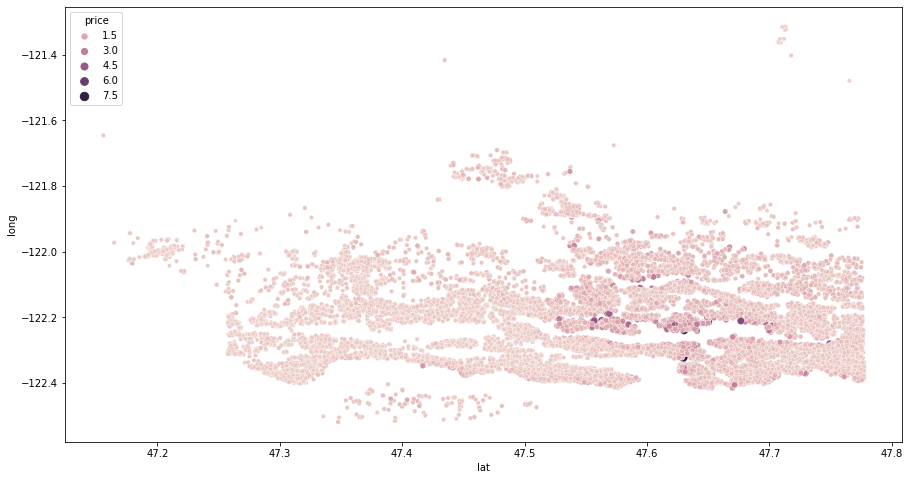

In [13]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = city_df['lat'], y = city_df['long'], hue = city_df['price'], size = city_df['price'])

In [14]:
# # Plot miles per gallon against horsepower with other semantics
# sns.relplot(x = city_df['lat'], y = city_df['long'], hue = city_df['price'],
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=city_df)

In [15]:
nb = '/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2019_53033_faces/tl_2019_53033_faces.shp'
regions = gpd.read_file(nb)

regions.sample(5)

TFID STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10 BLOCKCE10  \
30588  219521781        53        033    024300          1      1042   
1919   219504606        53        033    022606          3      3025   
56620  249405517        53        033    026002          3      3031   
55915  261225481        53        033    032702          5      5131   
19422  219512584        53        033    000100          1      1025   

      SUFFIX1CE ZCTA5CE10 UACE10 PUMACE10 STATEFP COUNTYFP TRACTCE BLKGRPCE  \
30588      None     98040  80389    11609      53      033  024300        1   
1919       None     98052  80389    11607      53      033  022606        3   
56620      None     98057  80389    11610      53      033  026002        3   
55915      None     98045  82675    11616      53      033  032702        5   
19422      None     98125  80389    11602      53      033  000100        1   

      COUSUBFP SUBMCDFP ESTATEFP CONCTYFP PLACEFP AIANNHFP AIANNHCE COMPTYP  \
30588    92931     None     None     None   45005     None     None    None   
1919     92931     None     None     None   57535     None     None    None   
56620    92931     None     None     None   57745     None     None    None   
55915    93078     None     None     None    None     None     None    None   
19422    92928     None     None     None   63000     None     None    None   

      TRSUBFP TRSUBCE ANRCFP TTRACTCE TBLKGPCE ELSDLEA SCSDLEA UNSDLEA  \
30588    None    None   None     None     None    None    None   04980   
1919     None    None   None     None     None    None    None   04230   
56620    None    None   None     None     None    None    None   07230   
55915    None    None   None     None     None    None    None   08040   
19422    None    None   None     None     None    None    None   07710   

      CD116FP SLDUST SLDLST CSAFP CBSAFP METDIVFP CNECTAFP NECTAFP NCTADVFP  \
30588      09    041    041   500  42660    42644     None    None     None   
1919       01    048    048   500  42660    42644     None    None     None   
56620      09    037    037   500  42660    42644     None    None     None   
55915      08    005    005   500  42660    42644     None    None     None   
19422      07    046    046   500  42660    42644     None    None     None   

      LWFLAG OFFSET  ATOTAL     INTPTLAT      INTPTLON  \
30588      L      N    1508  +47.5895853  -122.2536454   
1919       L      N   32756  +47.6672174  -122.1547739   
56620      L      N     613  +47.4845584  -122.2187559   
55915      L      N  156429  +47.4615747  -121.7111996   
19422      L      N   20462  +47.7291852  -122.2889584   

                                                geometry  
30588  POLYGON ((-122.25434 47.58952, -122.25426 47.5...  
1919   POLYGON ((-122.15693 47.66736, -122.15692 47.6...  
56620  POLYGON ((-122.21901 47.48463, -122.21841 47.4...  
55915  POLYGON ((-121.71627 47.46143, -121.71623 47.4...  
19422  POLYGON ((-122.28966 47.73010, -122.28831 47.7...

In [16]:
# regions.dtypes
regions.ZCTA5CE10 = pd.to_numeric(regions.ZCTA5CE10, errors='coerce')

In [17]:
regions["zipcode"] = regions["ZCTA5CE10"] 


plotprice = city_df.groupby("zipcode").price.mean()


plot_df = regions.join(plotprice, on="zipcode", how="inner")

In [18]:
regions2 = regions.join(plotprice, on='zipcode', how='left')

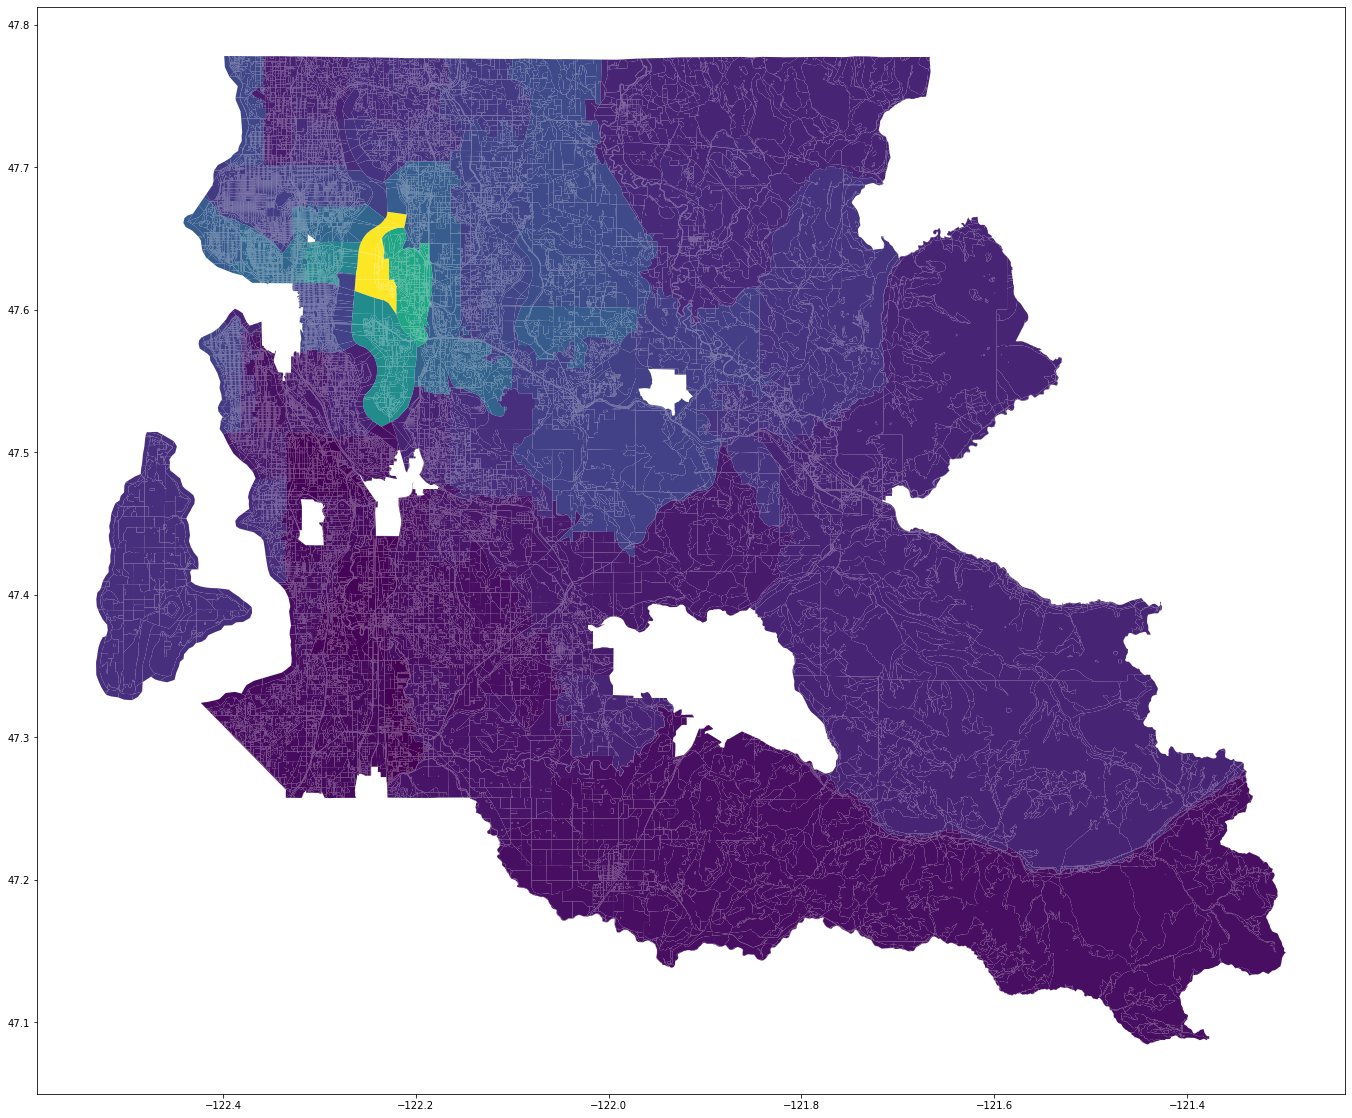

In [21]:
regions2.plot('price',figsize=(40,20))
plt.show()

In [22]:

dataByzip = city_df.groupby('zipcode')['price'].median().reset_index()

dataByzip.sort_values('price', ascending=False).head(10)

zipcode      price
24    98039  1892500.0
3     98004  1208000.0
25    98040   989900.0
48    98112   940000.0
4     98005   761225.0
5     98006   753000.0
53    98119   750000.0
41    98102   745000.0
38    98075   737444.0
47    98109   736000.0

In [23]:
# regions.dtypes


In [24]:
# merged = dataByzip.merge(regions, left_on='zipcode', right_on='ZCTA5CE10', how='left')
# merged
# joined = merged.merge(city_df.drop_duplicates(subset=['zipcode']),how='left')

In [25]:
# joined

In [26]:
# pd.concat(city_df, regions, how='left', left_on='zipcode', right_on='ZCTA5CE10')

In [27]:
# merged1 = regions.set_index('ZCTA5CE10').join(dataByzip.set_index('zipcode'))
# merged1 = merged.reset_index()
# # merged1 = merged.fillna(0)
# joined1 = joined[['zipcode', 'geometry', 'price']]
# merged1

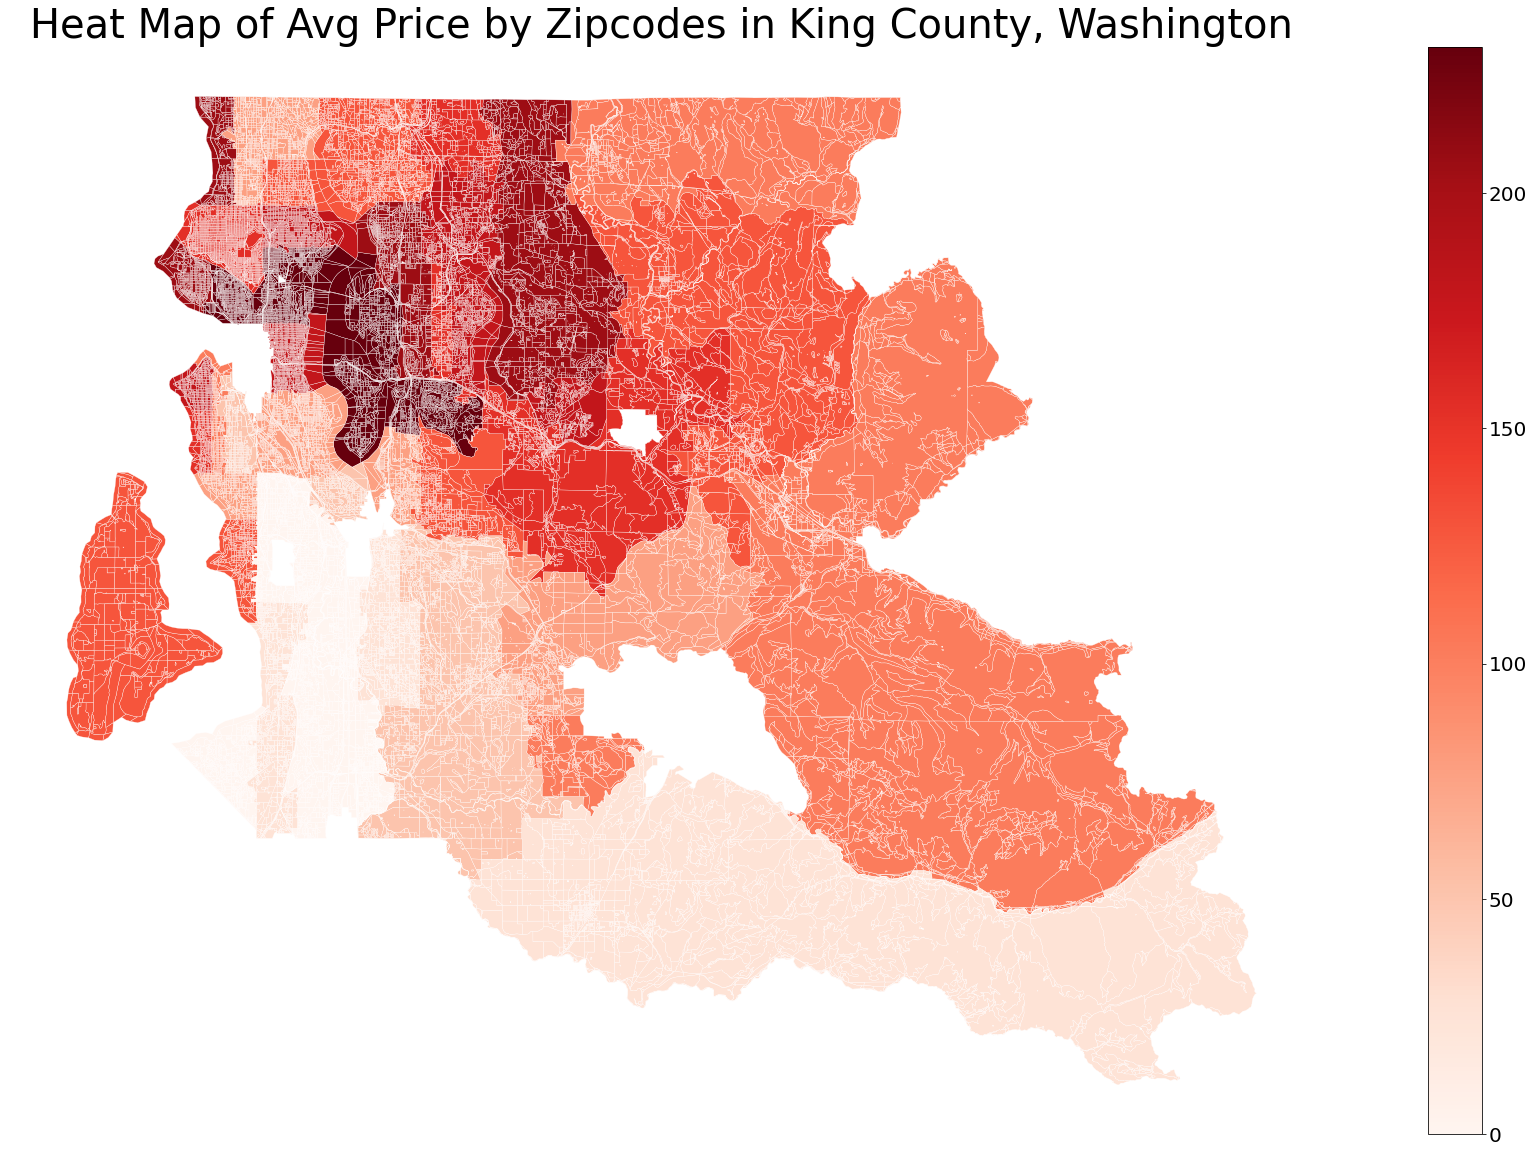

In [28]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
import libpysal 
import mapclassify

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Avg Price by Zipcodes in King County, Washington', fontdict={'fontsize': '40', 'fontweight' : '3'})

# geomet = [Point(xy) for xy in zip(city_df['long'], city_df['lat'])]
# gdf = GeoDataFrame(city_df, geometry=geomet,crs="EPSG:4326")  
# gdf.plot(ax=ax, markersize=20, color='blue', marker = 'o', label = "Long,Lat")
# # regions.plot(cmap=color,ax=ax, alpha = 0.4)

color = 'Reds'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# regions.plot()
plot_df.plot('price', cmap=color, scheme='Quantiles', k=10,linewidth=0.3, ax=ax, edgecolor='white', figsize=(40,20))
plt.show()

In [29]:
#rounding coordinates by chosen precision creates a grid
rounding_num=0.015 
city_df["lon_mod"]=np.round(city_df.long/rounding_num,0)*rounding_num

#adjusting for difference in actual distance between same numeric change in lat and lon to create a square grid
correction_coeff=0.5
city_df["lat_mod"]=np.round(city_df.lat/(rounding_num*correction_coeff),0)*(rounding_num*correction_coeff)

df_map=city_df[["lat_mod","lon_mod","price"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()

df_map.head()

lat_mod  lon_mod     price
0  47.1525 -121.650  380000.0
1  47.1675 -121.980  335000.0
2  47.1750 -122.025  302500.0
3  47.1750 -121.950  432000.0
4  47.1825 -122.040  790000.0

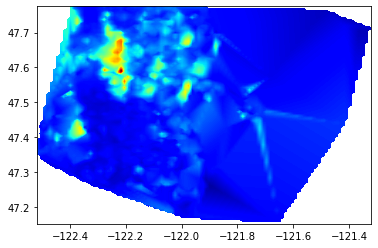

In [30]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from numpy import linspace

#Extracting x,y and values (z)
z=df_map.price
y=df_map.lat_mod
x=df_map.lon_mod

#Interpolating values to get better coverage
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')


#Creating contour plot with a step size of 1000
step_size=1000
cs = plt.contourf(xi,yi,zi,range(5000,int( np.nanmax(zi))+step_size,step_size),cmap=plt.cm.jet)

The boxplot below gives a sense of the distribution of the target data.

<AxesSubplot:>

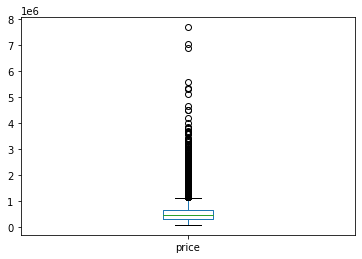

In [31]:
city_df['price'].plot(kind='box')

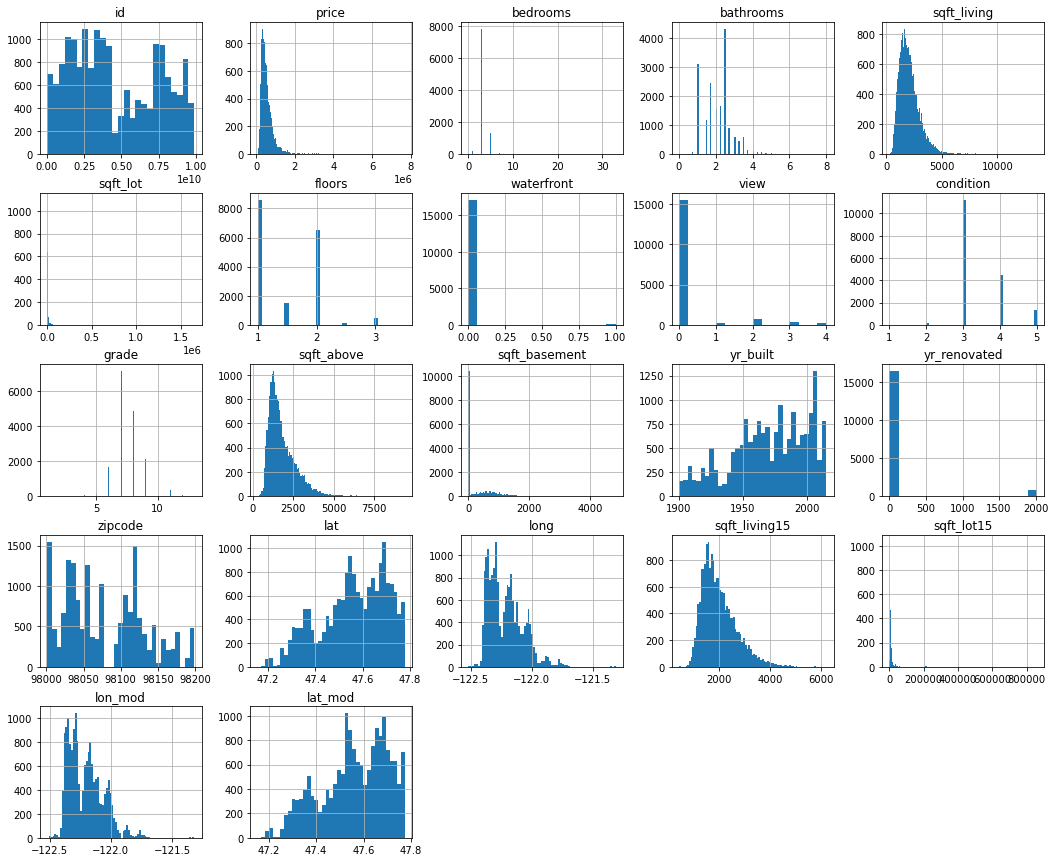

In [32]:
city_df.hist(figsize=(18,15), bins='auto');

<AxesSubplot:xlabel='grade'>

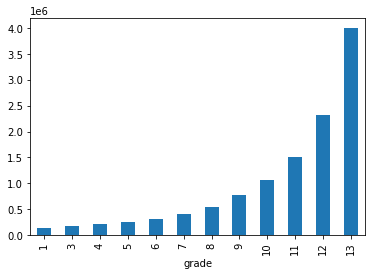

In [33]:
city_df.groupby('grade')['price'].mean().plot(kind='bar')


In [34]:
city_df[['lat','long','price']]

lat     long      price
0      47.4388 -122.162   365000.0
1      47.6784 -122.285   865000.0
2      47.5646 -122.129  1038000.0
3      47.6995 -122.228  1490000.0
4      47.6647 -122.083   711000.0
...        ...      ...        ...
17285  47.5858 -122.112   750000.0
17286  47.6687 -122.288   440000.0
17287  47.7635 -122.262   310000.0
17288  47.4199 -121.990   427500.0
17289  47.7366 -122.319   348000.0

[17290 rows x 3 columns]

In [35]:
city_df['lat_long'] = list(zip(city_df['lat'],city_df['long']))
city_df.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310  20141006T000000   365000.0         4       2.25         2070   
1  7974200820  20140821T000000   865000.0         5       3.00         2900   
2  7701450110  20140815T000000  1038000.0         4       2.50         3770   
3  9522300010  20150331T000000  1490000.0         3       3.50         4560   
4  9510861140  20140714T000000   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15              geom       county      city  \
0           2390        7700  47.4388,-122.162  King County  Fairwood   
1           2370        6283  47.6784,-122.285  King County   Seattle   
2           3710        9685  47.5646,-122.129  King County  Bellevue   
3           4050       14226  47.6995,-122.228  King County  Kirkland   
4           2250        4050  47.6647,-122.083  King County   Redmond   

   lon_mod  lat_mod                        lat_long  
0 -122.160  47.4375             (47.4388, -122.162)  
1 -122.280  47.6775             (47.6784, -122.285)  
2 -122.130  47.5650  (47.5646, -122.12899999999999)  
3 -122.235  47.7000             (47.6995, -122.228)  
4 -122.085  47.6625             (47.6647, -122.083)

In [36]:
city_df[['lat_long','price']].describe()

price
count  1.729000e+04
mean   5.407395e+05
std    3.733190e+05
min    7.500000e+04
25%    3.210000e+05
50%    4.500000e+05
75%    6.450000e+05
max    7.700000e+06

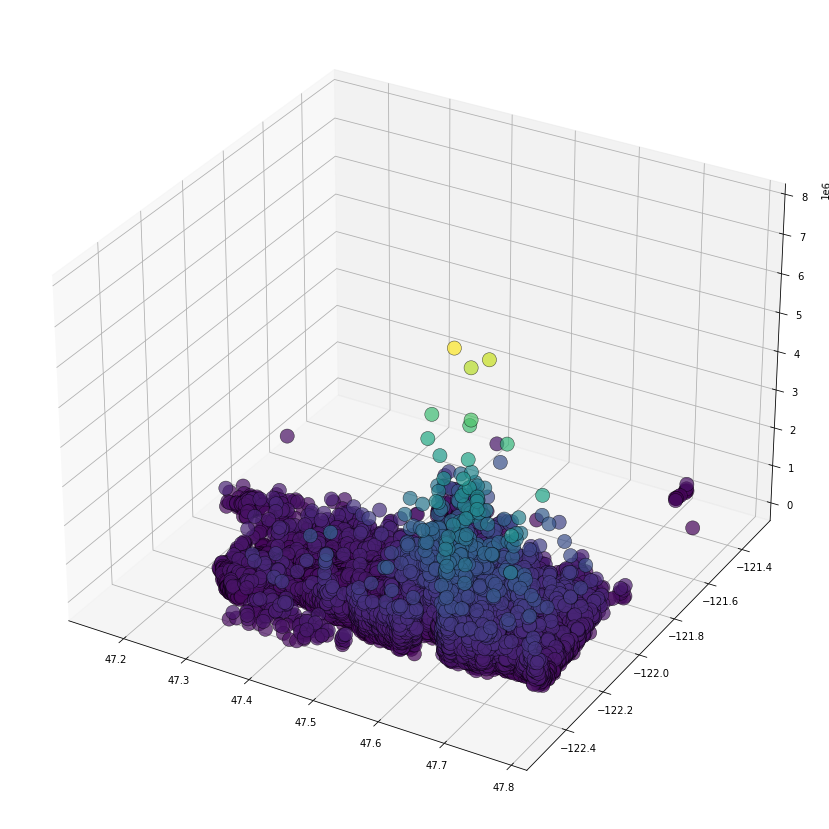

In [37]:
from mpl_toolkits.mplot3d import Axes3D

x = city_df['lat']
y = city_df['long']
z = city_df['price']
 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=.5, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

In [38]:
leave_out = ['id','date','month','year','price','geometry','lat_long']
for_plot = [x for x in city_df.columns if x not in leave_out]

In [39]:
for_plot

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'geom',
 'county',
 'city',
 'lon_mod',
 'lat_mod']

IndexError: index 6 is out of bounds for axis 0 with size 6

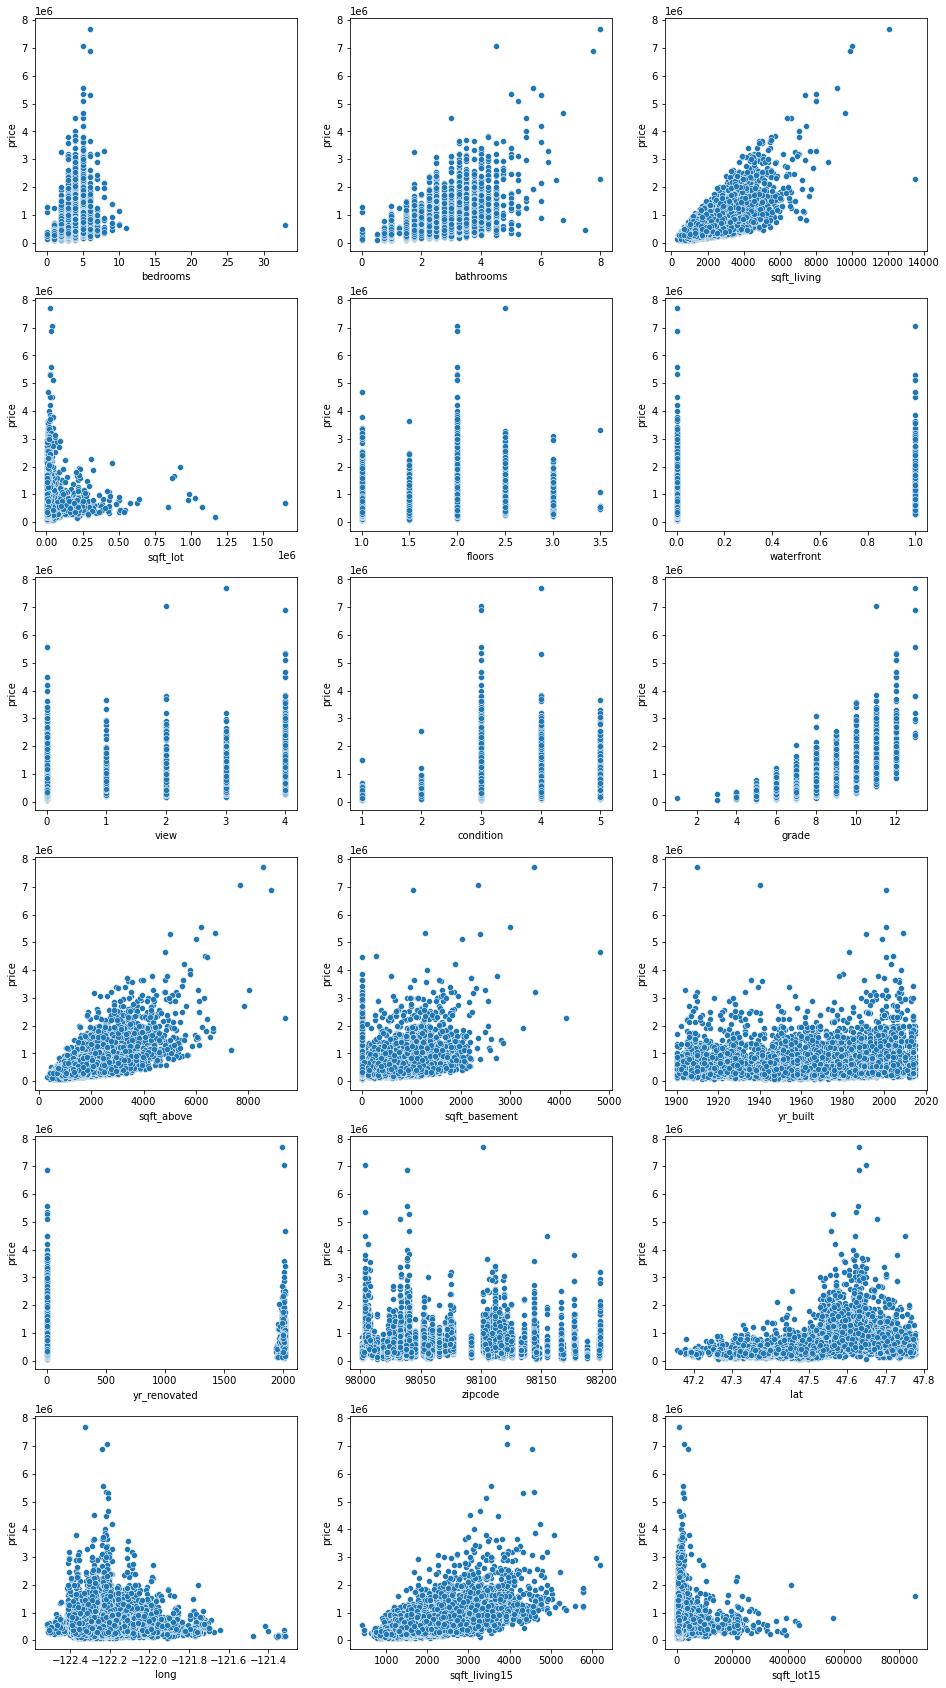

In [40]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

(22.5, -0.5)

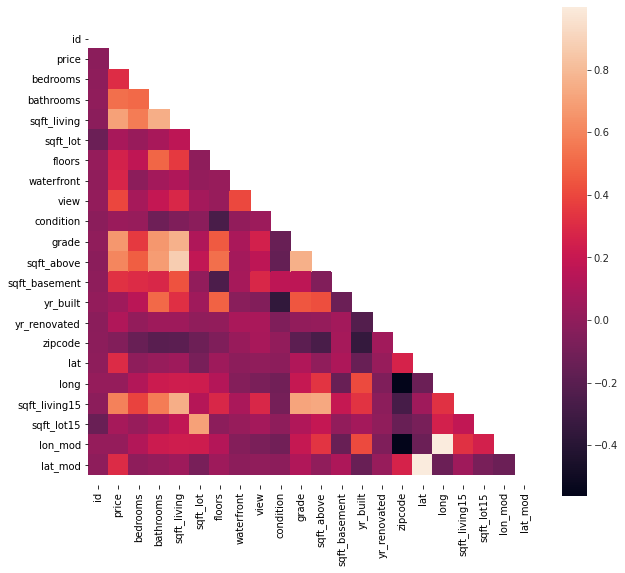

In [43]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(city_df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(city_df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

## Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [44]:
city_df[(city_df['bathrooms']==0) & (city_df['bedrooms']==0)]

id             date      price  bedrooms  bathrooms  \
483    3374500520  20150429T000000   355000.0         0        0.0   
1120   6306400140  20140612T000000  1095000.0         0        0.0   
3032   7849202190  20141223T000000   235000.0         0        0.0   
5424   3918400017  20150205T000000   380000.0         0        0.0   
9286   2954400190  20140624T000000  1295650.0         0        0.0   
10067  3980300371  20140926T000000   142000.0         0        0.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
483           2460      8049     2.0           0     0          3      8   
1120          3064      4764     3.5           0     2          3      7   
3032          1470      4800     2.0           0     0          3      7   
5424          1470       979     3.0           0     2          3      8   
9286          4810     28008     2.0           0     0          3     12   
10067          290     20875     1.0           0     0          1      1   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
483          2460              0      1990             0    98031  47.4095   
1120         3064              0      1990             0    98102  47.6362   
3032         1470              0      1996             0    98065  47.5265   
5424         1470              0      2006             0    98133  47.7145   
9286         4810              0      1990             0    98053  47.6642   
10067         290              0      1963             0    98024  47.5308   

          long  sqft_living15  sqft_lot15              geom       county  \
483   -122.168           2520        8050  47.4095,-122.168  King County   
1120  -122.322           2360        4000  47.6362,-122.322  King County   
3032  -121.828           1060        7200  47.5265,-121.828  King County   
5424  -122.356           1470        1399  47.7145,-122.356  King County   
9286  -122.069           4740       35061  47.6642,-122.069  King County   
10067 -121.888           1620       22850  47.5308,-121.888  King County   

                          city  lon_mod  lat_mod  \
483                       Kent -122.175  47.4075   
1120                   Seattle -122.325  47.6325   
3032                Snoqualmie -121.830  47.5275   
5424                   Seattle -122.355  47.7150   
9286   Union Hill-Novelty Hill -122.070  47.6625   
10067            Upper Preston -121.890  47.5275   

                             lat_long  
483    (47.4095, -122.16799999999999)  
1120              (47.6362, -122.322)  
3032   (47.5265, -121.82799999999999)  
5424   (47.7145, -122.35600000000001)  
9286              (47.6642, -122.069)  
10067  (47.5308, -121.88799999999999)

In [45]:
#Replace 33 bedrooms with 3 as it was a typo
city_df['bedrooms'] = city_df['bedrooms'].replace({33:3})

In [46]:
city_df[(city_df['yr_renovated']==0) & (city_df['yr_built']==1990)]

id             date      price  bedrooms  bathrooms  \
3      9522300010  20150331T000000  1490000.0         3       3.50   
113    6792100090  20140914T000000   683000.0         4       2.50   
257    4123830480  20140610T000000   392000.0         4       2.75   
288    3432500705  20141021T000000   410000.0         4       2.25   
308    1796370590  20150305T000000   255000.0         3       2.00   
...           ...              ...        ...       ...        ...   
16856  8001450060  20140820T000000   370000.0         5       3.00   
16890  8079030390  20150304T000000   446500.0         3       2.50   
16972  7701960130  20141017T000000   820000.0         3       2.50   
17056  4017050820  20150320T000000   569999.0         3       2.50   
17260  6388920460  20141226T000000   535000.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
3             4560     14608     2.0           0     2          3     12   
113           2620     10489     2.0           0     0          3      9   
257           1940      6555     2.0           0     0          3      8   
288           2200      8292     2.0           0     0          3      7   
308           1490      7599     1.0           0     0          3      7   
...            ...       ...     ...         ...   ...        ...    ...   
16856         2670      9920     1.0           0     0          3      8   
16890         2650      7286     2.0           0     0          3      8   
16972         2980     18935     1.5           0     0          3     11   
17056         3080     13880     2.0           0     0          3      9   
17260         2110      8164     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
3            4560              0      1990             0    98034  47.6995   
113          2620              0      1990             0    98052  47.6732   
257          1940              0      1990             0    98038  47.3701   
288          2200              0      1990             0    98155  47.7456   
308          1490              0      1990             0    98042  47.3687   
...           ...            ...       ...           ...      ...      ...   
16856        1400           1270      1990             0    98001  47.3211   
16890        2650              0      1990             0    98059  47.5084   
16972        2980              0      1990             0    98077  47.7133   
17056        3080              0      1990             0    98038  47.3726   
17260        2110              0      1990             0    98056  47.5269   

          long  sqft_living15  sqft_lot15              geom       county  \
3     -122.228           4050       14226  47.6995,-122.228  King County   
113   -122.143           2430        7701  47.6732,-122.143  King County   
257   -122.041           1840        6912  47.3701,-122.041  King County   
288   -122.315           1090        8290  47.7456,-122.315  King County   
308   -122.088           1560        7710  47.3687,-122.088  King County   
...        ...            ...         ...               ...          ...   
16856 -122.277           1890       10341  47.3211,-122.277  King County   
16890 -122.154           2400        7220  47.5084,-122.154  King County   
16972 -122.079           3670       18225  47.7133,-122.079  King County   
17056 -122.025           2780       15318  47.3726,-122.025  King County   
17260 -122.171           2390        7499  47.5269,-122.171  King County   

                          city  lon_mod  lat_mod  \
3                     Kirkland -122.235  47.7000   
113                    Redmond -122.145  47.6700   
257               Maple Valley -122.040  47.3700   
288                  Shoreline -122.310  47.7450   
308                  Covington -122.085  47.3700   
...                        ...      ...      ...   
16856           Lakeland North -122.280  47.317

In [47]:
#Create new yr_renovated column removing 0 values in yr_renovated column to an actual year(yr_built)
city_df['yr_renovated2'] = np.where(city_df['yr_renovated']==0, city_df['yr_built'], city_df['yr_renovated'])

In [48]:
#Change date column to datetime type and create two additional columns for month and year sold
city_df['date'] = pd.to_datetime(city_df['date']) #turn date column to date type
city_df['month'] = pd.DatetimeIndex(city_df.loc[:,'date']).month #Create month column
city_df['year'] = pd.DatetimeIndex(city_df.loc[:,'date']).year #create year column

In [49]:
city_df.groupby('year')['month'].value_counts()

year  month
2014  7        1761
      6        1753
      8        1561
      10       1493
      5        1423
      9        1388
      12       1170
      11       1154
2015  4        1804
      3        1496
      2         990
      1         792
      5         505
Name: month, dtype: int64

In [50]:
#keep
# df['bathrooms'] = df['bathrooms'].replace(0,df['bathrooms'].median())
# df['bedrooms'] = df['bedrooms'].replace(0,df['bedrooms'].median())
city_df[city_df['bathrooms'] == 0]

id       date      price  bedrooms  bathrooms  sqft_living  \
483    3374500520 2015-04-29   355000.0         0        0.0         2460   
1120   6306400140 2014-06-12  1095000.0         0        0.0         3064   
3032   7849202190 2014-12-23   235000.0         0        0.0         1470   
5424   3918400017 2015-02-05   380000.0         0        0.0         1470   
9060   3421079032 2015-02-17    75000.0         1        0.0          670   
9286   2954400190 2014-06-24  1295650.0         0        0.0         4810   
10067  3980300371 2014-09-26   142000.0         0        0.0          290   
12982   203100435 2014-09-18   484000.0         1        0.0          690   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
483        8049     2.0           0     0          3      8        2460   
1120       4764     3.5           0     2          3      7        3064   
3032       4800     2.0           0     0          3      7        1470   
5424        979     3.0           0     2          3      8        1470   
9060      43377     1.0           0     0          3      3         670   
9286      28008     2.0           0     0          3     12        4810   
10067     20875     1.0           0     0          1      1         290   
12982     23244     1.0           0     0          4      7         690   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
483                0      1990             0    98031  47.4095 -122.168   
1120               0      1990             0    98102  47.6362 -122.322   
3032               0      1996             0    98065  47.5265 -121.828   
5424               0      2006             0    98133  47.7145 -122.356   
9060               0      1966             0    98022  47.2638 -121.906   
9286               0      1990             0    98053  47.6642 -122.069   
10067              0      1963             0    98024  47.5308 -121.888   
12982              0      1948             0    98053  47.6429 -121.955   

       sqft_living15  sqft_lot15              geom       county  \
483             2520        8050  47.4095,-122.168  King County   
1120            2360        4000  47.6362,-122.322  King County   
3032            1060        7200  47.5265,-121.828  King County   
5424            1470        1399  47.7145,-122.356  King County   
9060            1160       42882  47.2638,-121.906  King County   
9286            4740       35061  47.6642,-122.069  King County   
10067           1620       22850  47.5308,-121.888  King County   
12982           1690       19290  47.6429,-121.955  King County   

                          city  lon_mod  lat_mod  \
483                       Kent -122.175  47.4075   
1120                   Seattle -122.325  47.6325   
3032                Snoqualmie -121.830  47.5275   
5424                   Seattle -122.355  47.7150   
9060                Cumberland -121.905  47.2650   
9286   Union Hill-Novelty Hill -122.070  47.6625   
10067            Upper Preston -121.890  47.5275   
12982                Ames Lake -121.950  47.6400   

                             lat_long  yr_renovated2  month  year  
483    (47.4095, -122.16799999999999)           1990      4  2015  
1120              (47.6362, -122.322)           1990      6  2014  
3032   (47.5265, -121.82799999999999)           1996     12  2014  
5424   (47.7145, -122.35600000000001)           2006      2  2015  
9060              (47.2638, -121.906)           1966      2  2015  
9286              (47.6642, -122.069)           1990      6  2014  
10067  (47.5308, -121.88799999999999)           1963      9  2014  
12982             (47.6429, -121.955)           1948      9  2014

In [51]:
city_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean   4.565502e+09  5.407395e+05      3.370735      2.111943   2081.464604   
std    2.874656e+09  3.733190e+05      0.911923      0.770476    920.018539   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000   
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000   
mean   1.524340e+04      1.490312      0.007981      0.238519      3.408502   
std    4.230462e+04      0.538909      0.088985      0.775229      0.651296   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.081250e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.642000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.072575e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000   
mean       7.654425   1789.306015     292.158589   1970.792019     83.806304   
std        1.174718    829.265107     443.151874     29.343516    400.329376   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1974.000000      0.000000   
75%        8.000000   2214.500000     560.000000   1996.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000   
mean   98078.193175     47.560058   -122.214258    1987.986698   12873.475824   
std       53.607949      0.138412      0.140857     684.802635   27227.437583   
min    98001.000000     47.155900   -122.519000     399.000000     659.000000   
25%    98033.000000     47.471200   -122.329000    1490.000000    5111.250000   
50%    98065.000000     47.571600   -122.230000    1840.000000    7622.500000   
75%    98118.000000     47.677900   -122.126000    2360.000000   10101.750000   
max    98199.000000     47.777600   -121.315000    6210.000000  858132.000000   

            lon_mod       lat_mod  yr_renovated2         month          year  
count  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  
mean    -122.214271     47.560065    1973.158010      6.570561   2014.323135  
std        0.140926      0.138429      28.805976      3.116999      0.467687  
min     -122.520000     47.152500    1900.000000      1.000000   2014.000000  
25%     -122.325000     47.467500    1954.000000      4.000000   2014.000000  
50%     -122.235000     47.572500    1977.000000      6.000000   2014.000000  
75%     -122.130000     47.677500    1999.000000      9.000000   2015.000000  
max     -121.320000     47.775000    2015.000000     12.000000   2015.000000

In [52]:
city_df[['yr_built','yr_renovated']]

yr_built  yr_renovated
0          1986             0
1          1977             0
2          1997             0
3          1990             0
4          2004             0
...         ...           ...
17285      1958             0
17286      1948             0
17287      1953             0
17288      1971             0
17289      1952             0

[17290 rows x 2 columns]

In [53]:
city_df.corr().loc['sqft_living','sqft_living15']

0.7550658985518917

In [54]:
city_df.corr().loc['sqft_lot','sqft_lot15']

0.701875229248093

In [55]:
city_df.corr().loc['sqft_living','price']

0.7035403039789652

In [56]:
city_df.corr(method='pearson')

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.015644 -0.000143   0.003833    -0.014251 -0.129837   
price         -0.015644  1.000000  0.313775   0.524335     0.703540  0.086803   
bedrooms      -0.000143  0.313775  1.000000   0.524033     0.588536  0.030674   
bathrooms      0.003833  0.524335  0.524033   1.000000     0.755270  0.085470   
sqft_living   -0.014251  0.703540  0.588536   0.755270     1.000000  0.166810   
sqft_lot      -0.129837  0.086803  0.030674   0.085470     0.166810  1.000000   
floors         0.017126  0.256985  0.179908   0.497967     0.357169 -0.002205   
waterfront     0.000101  0.275779 -0.008668   0.065848     0.109738  0.015356   
view           0.012594  0.395485  0.082724   0.188817     0.283336  0.073058   
condition     -0.014272  0.036099  0.021376  -0.122976    -0.061530 -0.013715   
grade          0.003163  0.666215  0.366405   0.664191     0.762929  0.110320   
sqft_above    -0.013932  0.607760  0.488420   0.686853     0.876696  0.180755   
sqft_basement -0.003516  0.323312  0.307873   0.282700     0.435529  0.008065   
yr_built       0.013697  0.056450  0.159936   0.507761     0.319397  0.054228   
yr_renovated  -0.019560  0.117770  0.014489   0.048140     0.051448  0.004520   
zipcode       -0.008166 -0.048958 -0.152831  -0.201527    -0.195893 -0.126590   
lat           -0.001865  0.302394 -0.003991   0.023074     0.052646 -0.082029   
long           0.017388  0.019327  0.129593   0.221308     0.234453  0.226190   
sqft_living15 -0.007494  0.585567  0.401073   0.568080     0.755066  0.136959   
sqft_lot15    -0.139605  0.081423  0.028038   0.086499     0.179570  0.701875   
lon_mod        0.017464  0.018778  0.129429   0.221240     0.233896  0.226002   
lat_mod       -0.002039  0.302186 -0.004100   0.023058     0.052444 -0.082037   
yr_renovated2  0.008698  0.104812  0.168762   0.536815     0.342839  0.052918   
month         -0.014844 -0.004350  0.002985   0.012950     0.017737 -0.001722   
year           0.012953 -0.002334 -0.010211  -0.030045    -0.033606  0.003141   

                 floors  waterfront      view  condition     grade  \
id             0.017126    0.000101  0.012594  -0.014272  0.003163   
price          0.256985    0.275779  0.395485   0.036099  0.666215   
bedrooms       0.179908   -0.008668  0.082724   0.021376  0.366405   
bathrooms      0.497967    0.065848  0.188817  -0.122976  0.664191   
sqft_living    0.357169    0.109738  0.283336  -0.061530  0.762929   
sqft_lot      -0.002205    0.015356  0.073058  -0.013715  0.110320   
floors         1.000000    0.025132  0.025883  -0.259230  0.458984   
waterfront     0.025132    1.000000  0.407565   0.009608  0.092234   
view           0.025883    0.407565  1.000000   0.045060  0.249554   
condition     -0.259230    0.009608  0.045060   1.000000 -0.142066   
grade          0.458984    0.092234  0.249554  -0.142066  1.000000   
sqft_above     0.528509    0.077162  0.164747  -0.157466  0.758247   
sqft_basement -0.247481    0.083433  0.279939   0.166923  0.165003   
yr_built       0.483657   -0.021981 -0.049593  -0.358921  0.448003   
yr_renovated   0.005985    0.094268  0.091291  -0.060969  0.007988   
zipcode       -0.060560    0.034282  0.089475   0.007068 -0.184946   
lat            0.048227   -0.013331  0.003820  -0.009927  0.116196   
long           0.128795   -0.042728 -0.077572  -0.109200  0.198369   
sqft_living15  0.283933    0.091090  0.279999  -0.094307  0.715745   
sqft_lot15    -0.008170    0.026895  0.073185  -0.007125  0.116062   
lon_mod        0.128993   -0.042322 -0.077455  -0.109516  0.197757   
lat_mod        0.048414   -0.013284  0.003713  -0.010193  0.116004   
yr_renovated2  0.498899    0.005262 -0.020531  -0.392758  0.458830   
month          0.019629    0.005685 -0.004189   0.017099  0.015166   
year          -0.024641   -0.000824  0.000701  -0.044871 -0.036560   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id             

## Feature Engineering

In [94]:
city_df['property_age'] = 2020 - city_df['yr_built']

In [95]:
city_df['yrs_since_reno'] = 2020 - city_df['yr_renovated2']

In [96]:
city_df['yrs_btwn_built_reno'] = city_df['yr_renovated2'] - city_df['yr_built']

In [97]:
city_df['property_age_when_sold'] = city_df['year'] - city_df['yr_built']

In [98]:
city_df['has_basement'] = np.where(city_df['sqft_basement']==0, 0, 1)

In [99]:
city_df['has_view'] = np.where(city_df['view']==0, 0, 1)

In [226]:
city_df.groupby(['yr_built'])['price'].mean().sort_values(ascending=False)

yr_built
1933    823574.074074
1905    785712.631579
2001    764142.325490
2015    760906.034483
1909    717651.906667
2014    691102.339956
2000    685785.081871
1902    676645.454545
2013    673810.053254
1910    672368.089286
1907    670511.365385
1936    670441.666667
1906    669378.013699
1931    667079.347826
1927    661942.340000
1991    652368.163842
2008    639025.693950
2006    637061.416910
1911    635523.214286
1999    635102.009259
1997    626838.690647
1926    625982.172185
1921    625936.129032
1928    620863.761905
2007    616687.561194
1912    613817.388060
1925    610158.633094
1996    609102.044586
1939    602660.134146
1904    599607.055556
1940    597595.931624
1937    596409.468085
2004    596023.075000
1998    594461.282723
1916    590811.903226
1914    589636.292683
1900    588646.242857
1988    585161.305164
1913    584966.000000
1922    584296.540541
2005    582505.264535
1923    579694.954545
1995    579332.304965
1915    577701.166667
1924    573463.423423
1

In [229]:
city_df['yr_built'].quantile(.9)

2007.0

In [237]:
city_df[city_df['yr_renovated2'] >= 2010]

id       date      price  bedrooms  bathrooms  sqft_living  \
39      249000180 2014-12-01  1890000.0         4       4.25         4285   
42     9264450460 2014-06-03   309000.0         5       2.75         2481   
54     9301300805 2014-12-15   675000.0         3       2.50         1300   
69     2937300440 2014-09-08   923990.0         4       2.50         3600   
80      151000075 2015-02-06   856000.0         3       2.50         2160   
...           ...        ...        ...       ...        ...          ...   
17189  2201500240 2014-07-30   475000.0         3       1.75         1260   
17236  2768100512 2015-04-22   659000.0         2       2.50         1450   
17245  7203160190 2014-10-29   950000.0         5       4.00         4100   
17257  1972200555 2014-07-14   610000.0         3       1.75         1630   
17276  1777600850 2014-06-24   859000.0         4       2.25         3550   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
39         9345     2.0           0     0          3     10        4285   
42         4045     2.0           0     0          3      8        2481   
54         1590     2.0           0     0          3      8        1100   
69         6055     2.0           0     0          3      9        3600   
80         3920     2.0           0     0          3      9        2160   
...         ...     ...         ...   ...        ...    ...         ...   
17189     10065     1.0           0     0          3      7        1260   
17236      1213     2.0           0     0          3      9        1110   
17245      8120     2.0           0     0          3      9        4100   
17257      1500     3.0           0     0          3      8        1630   
17276     13900     1.0           0     0          3      8        1830   

       sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
39                 0      2013             0  47.6332 -122.199           1570   
42                 0      2014             0  47.2602 -122.284           2363   
54               200      2014             0  47.6384 -122.343           1070   
69                 0      2014             0  47.7053 -122.126           3590   
80                 0      2014             0  47.5762 -122.415           1500   
...              ...       ...           ...      ...      ...            ...   
17189              0      1954          2014  47.5727 -122.138           1320   
17236            340      2015             0  47.6692 -122.372           1620   
17245              0      2011             0  47.6917 -122.020           4100   
17257              0      2014             0  47.6536 -122.354           1570   
17276           1720      2010             0  47.5681 -122.127           2770   

       sqft_lot15              geom       county                     city  \
39           8994  47.6332,-122.199  King County                 Bellevue   
42           4175  47.2602,-122.284  King County           Lakeland South   
54           1223  47.6384,-122.343  King County                  Seattle   
69           6050  47.7053,-122.126  King County                  Redmond   
80           4920  47.5762,-122.415  King County                  Seattle   
...           ...               ...          ...                      ...   
17189       10278  47.5727,-122.138  King County                 Bellevue   
17236        1456  47.6692,-122.372  King County                  Seattle   
17245        7625   47.6917,-122.02  King County  Union Hill-Novelty Hill   
17257        1335  47.6536,-122.354  King County                  Seattle   
17276       12200  47.5681,-122.127  King County                 Bellevue   

       lon_mod  lat_mod  ... has_view     grade_exp  zipcode#98004  \
39    -122.205  47.6325  ...        0  22026.465795              1   
42    -122.280  47.2575  ...        0   2980.957987              0   
54    -122.340  47.6400  ...        0   2980.957987              0   
69    -122.

In [232]:
city_df['yr_renovated2'].describe()

count    17290.000000
mean      1973.158010
std         28.805976
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_renovated2, dtype: float64

In [238]:
city_df['newly_built'] = np.where(city_df['yr_built']>=2010, 1, 0)

In [240]:
city_df['charm'] = np.where((city_df['yr_built']<=1977) & (city_df['yr_renovated2']>=2010), 1, 0)

In [100]:
city_df['grade_exp'] = np.exp(city_df['grade'])

In [246]:
city_df.groupby('newly_built')['price'].mean()

newly_built
0    534754.801864
1    640020.592065
Name: price, dtype: float64

<AxesSubplot:xlabel='newly_built', ylabel='price'>

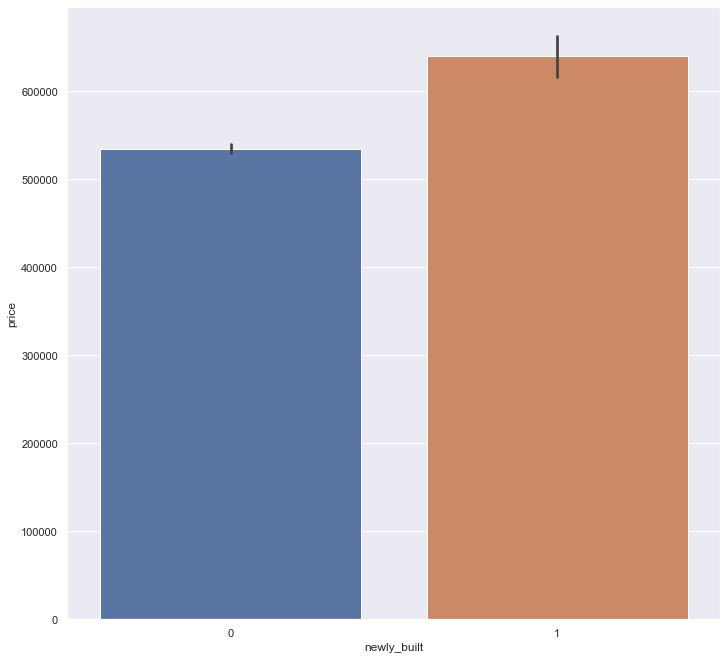

In [248]:
sns.barplot(data=city_df,x=city_df['newly_built'],y='price')

In [242]:
city_df.charm.value_counts()

0    17151
1      139
Name: charm, dtype: int64

In [249]:
city_df.groupby('charm')['price'].mean()

charm
0    539621.565331
1    678685.820144
Name: price, dtype: float64

<AxesSubplot:xlabel='charm', ylabel='price'>

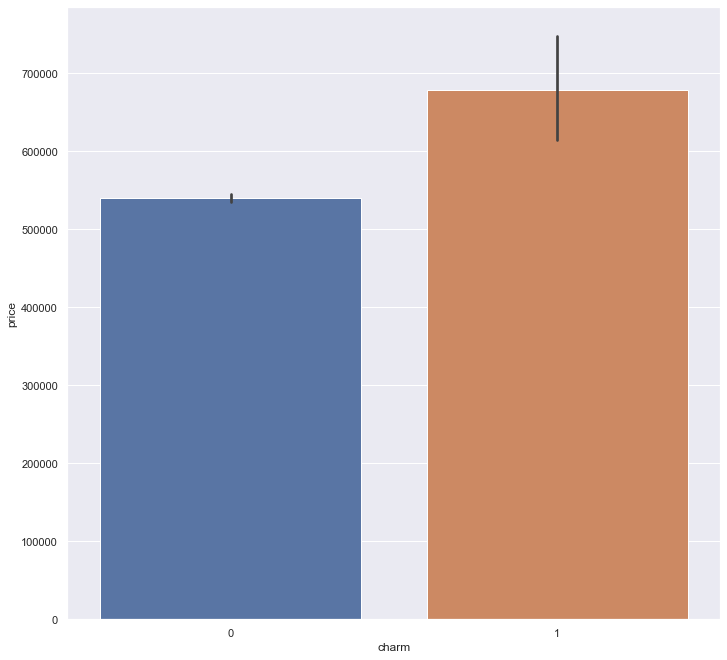

In [250]:
sns.barplot(data=city_df,x=city_df['charm'],y='price')

In [101]:
city_df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
98033    8.027175e+05
98075    7.939692e+05
98199    7.871469e+05
98074    6.912549e+05
98053    6.773342e+05
98077    6.768898e+05
98177    6.552490e+05
98052    6.460591e+05
98008    6.407492e+05
98144    6.213533e+05
98122    6.192377e+05
98029    6.156723e+05
98116    6.150221e+05
98115    6.137439e+05
98027    6.072946e+05
98007    5.975536e+05
98024    5.909915e+05
98103    5.897893e+05
98107    5.834824e+05
98117    5.701880e+05
98072    5.667307e+05
98136    5.659156e+05
98065    5.272174e+05
98034    5.238643e+05
98070    4.956727e+05
98059    4.943730e+05
98011    4.906393e+05
98166    4.793758e+05
98125    4.752226e+05
98028    4.684170e+05
98014    4.562057e+05
98045    4.313185e+05
98019    4.284222e+05
98126    4.250761e+05
98010    4.248736e+05
98

In [102]:
city_df.groupby('zipcode')['price'].mean().describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

In [103]:
city_df.groupby('zipcode')['price'].mean().quantile(.8)

680118.32491896

In [104]:
# df[(df['yr_renovated2']==1900) & (df['yrs_since_reno']==5)]
city_df.groupby('yrs_since_reno')['price'].mean().sort_values(ascending=False)
city_df.groupby('grade_exp')['price'].mean().sort_values(ascending=False)
city_df.groupby('has_basement')['price'].mean().sort_values(ascending=False)

has_basement
1    622734.178960
0    487510.298932
Name: price, dtype: float64

## Statistical Tests

In [254]:
city_df.groupby('charm')['price'].mean()

charm
0    539621.565331
1    678685.820144
Name: price, dtype: float64

In [263]:
ch1 = city_df.groupby('charm')['price'].get_group(0)
ch2 = city_df.groupby('charm')['price'].get_group(1)

### Two-Sample t-test to compare price of 'charm' to no charm

In [271]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
    se1, se2 = sem(data1), sem(data2)
# standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    degf = len(data1) + len(data2) - 2
# calculate the critical value
    cv = t.ppf(1.0 - alpha, degf)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), degf)) * 2.0
# return everything
    return t_stat, degf, cv, p


# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(ch1, ch2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-3.880, df=17288, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [269]:
print(np.var(ch1))
print(np.var(ch2))
print(np.var(ch2)/np.var(ch1))

138905300210.2246
176156853533.47122
1.2681794954322743


In [272]:
stats.ttest_ind(ch1, ch2, equal_var=False)

Ttest_indResult(statistic=-3.8800009248240555, pvalue=0.0001603282109860667)

In [273]:
new1 = city_df.groupby('newly_built')['price'].get_group(0)
new2 = city_df.groupby('newly_built')['price'].get_group(1)

### Two sample t-test to compare newly built and non-newly built homes

In [277]:
# calculate the t test
alpha = 0.05
t_stat, degf, cv, p = independent_ttest(new1, new2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-8.328, df=17288, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [275]:
print(np.var(new1))
print(np.var(new2))
print(np.var(new2)/np.var(new1))

138173797371.0076
148569432914.15808
1.07523594010547


In [279]:
stats.ttest_ind(new1, new2, equal_var=False)

Ttest_indResult(statistic=-8.328070462523947, pvalue=2.43081170151593e-16)

In [60]:
city_df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [61]:
city_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15              geom       county      city  \
0           2390        7700  47.4388,-122.162  King County  Fairwood   
1           2370        6283  47.6784,-122.285  King County   Seattle   
2           3710        9685  47.5646,-122.129  King County  Bellevue   
3           4050       14226  47.6995,-122.228  King County  Kirkland   
4           2250        4050  47.6647,-122.083  King County   Redmond   

   lon_mod  lat_mod                        lat_long  yr_renovated2  month  \
0 -122.160  47.4375             (47.4388, -122.162)           1986     10   
1 -122.280  47.6775             (47.6784, -122.285)           1977      8   
2 -122.130  47.5650  (47.5646, -122.12899999999999)           1997      8   
3 -122.235  47.7000             (47.6995, -122.228)           1990      3   
4 -122.085  47.6625             (47.6647, -122.083)           2004      7   

   year  
0  2014  
1  2014  
2  2014  
3  2015  
4  2014

In [199]:
city_df.yr_built.describe()

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

In [280]:
# filtered_df = city_df.loc[(city_df['view']>0) & (city_df['year']>2000)]

In [281]:
# small_df = city_df[["budget","gross"]]


In [282]:
# small_df

<AxesSubplot:xlabel='property_age', ylabel='price'>

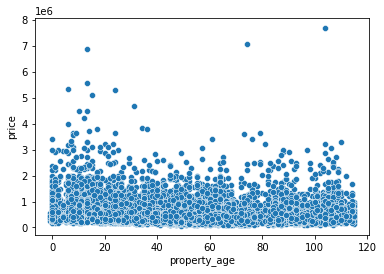

In [105]:
sns.scatterplot(data=city_df,x=city_df['property_age'],y='price')

In [106]:
city_df.groupby('yrs_since_built')['price'].mean().sort_values(ascending=False)

yrs_since_built
87     823574.074074
115    785712.631579
19     764142.325490
5      760906.034483
111    717651.906667
6      691102.339956
20     685785.081871
118    676645.454545
7      673810.053254
110    672368.089286
113    670511.365385
84     670441.666667
114    669378.013699
89     667079.347826
93     661942.340000
29     652368.163842
12     639025.693950
14     637061.416910
109    635523.214286
21     635102.009259
23     626838.690647
94     625982.172185
99     625936.129032
92     620863.761905
13     616687.561194
108    613817.388060
95     610158.633094
24     609102.044586
81     602660.134146
116    599607.055556
80     597595.931624
83     596409.468085
16     596023.075000
22     594461.282723
104    590811.903226
106    589636.292683
120    588646.242857
32     585161.305164
107    584966.000000
98     584296.540541
15     582505.264535
97     579694.954545
25     579332.304965
105    577701.166667
96     573463.423423
91     570868.904762
17     569813.0415

<AxesSubplot:xlabel='yrs_since_built', ylabel='price'>

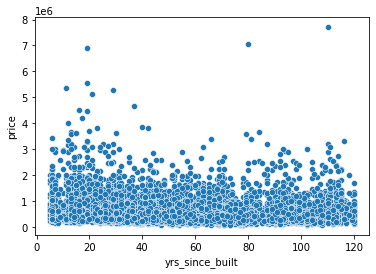

In [107]:
sns.scatterplot(data=city_df,x=city_df['yrs_since_built'],y='price')

In [108]:
city_df['yrs_btwn_built_reno'].describe()

count    17290.000000
mean         2.365992
std         12.307759
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        114.000000
Name: yrs_btwn_built_reno, dtype: float64

In [109]:
leave_out = ['id','date','month','year','price','geometry','lat_long']
for_plot = [x for x in city_df.columns if x not in leave_out]

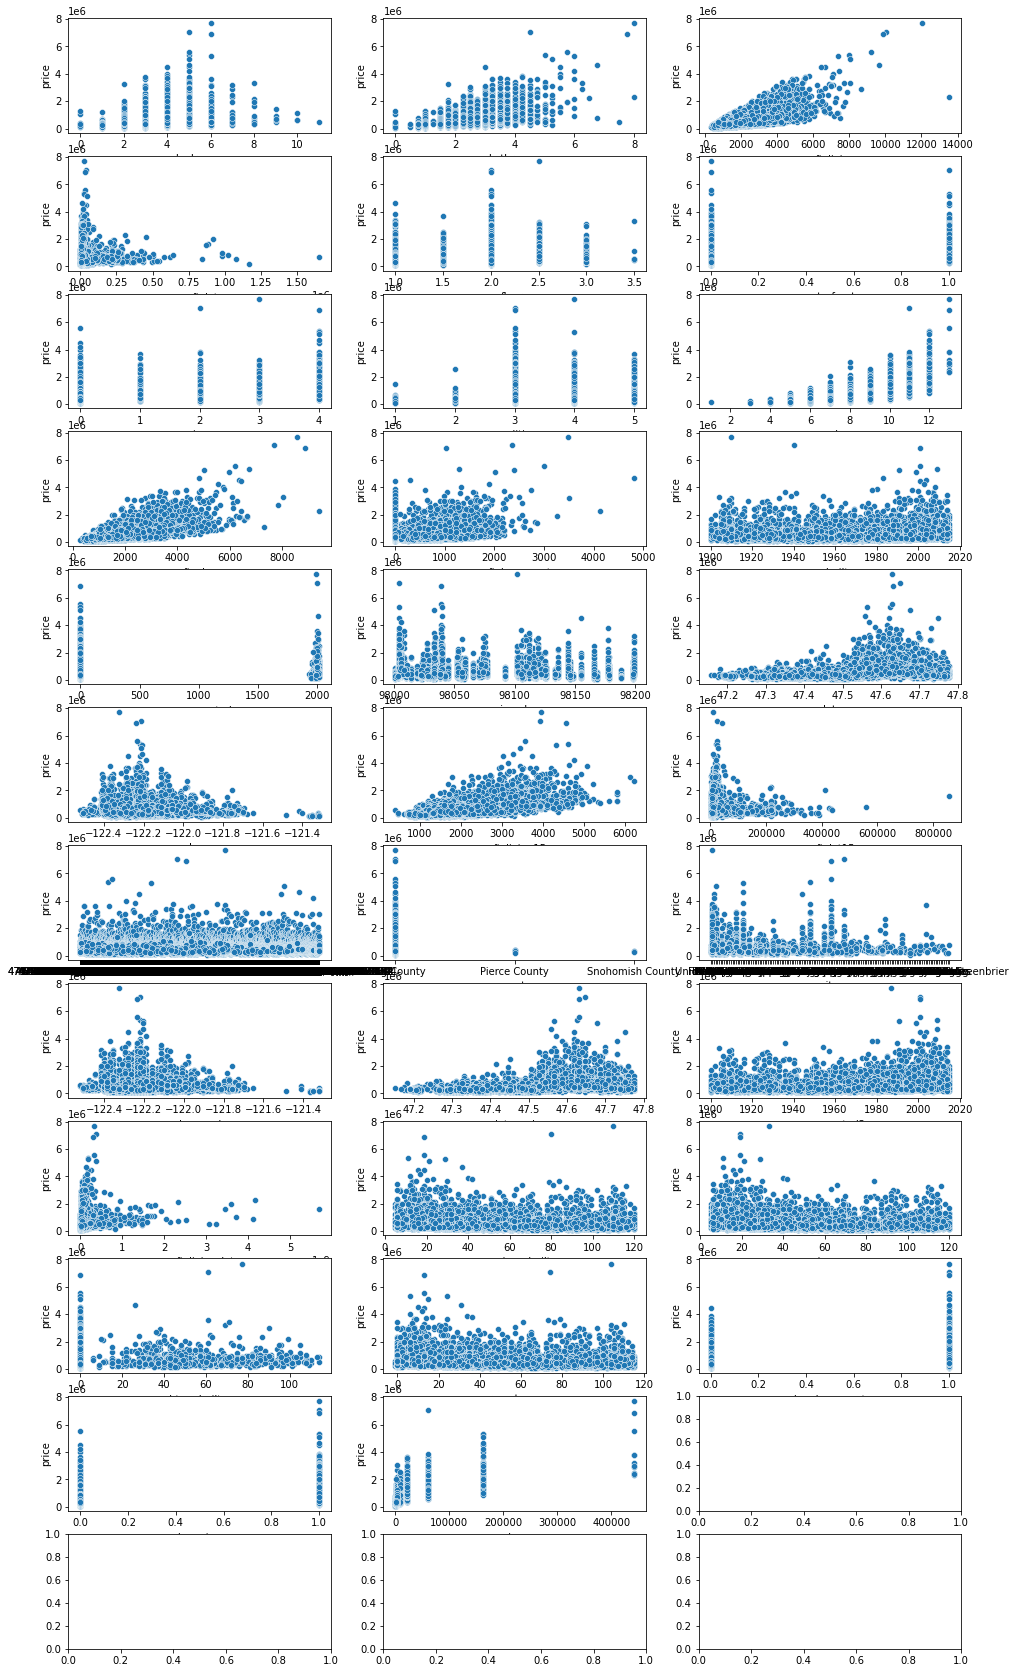

In [111]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=city_df, x=column, y='price', ax=axes[i//3, i%3])

In [296]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(city)', data=city_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq       df          F  PR(>F)
C(city)   7.748920e+14    141.0  57.652404     0.0
Residual  1.634625e+15  17148.0        NaN     NaN

In [302]:
import researchpy as rp

In [305]:
city_df.price.describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [304]:
rp.summary_cont(city_df['price'])

Variable        N         Mean           SD         SE    95% Conf.  \
0    price  17290.0  540739.5486  373318.9787  2839.1123  535174.6012   

      Interval  
0  546304.4961

In [308]:
city_df.city

0         Fairwood
1          Seattle
2         Bellevue
3         Kirkland
4          Redmond
           ...    
17285     Bellevue
17286      Seattle
17287      Kenmore
17288       Hobart
17289    Shoreline
Name: city, Length: 17290, dtype: object

In [310]:
rp.summary_cont(city_df['price'].groupby(city_df['city']))

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


N          Mean            SD           SE  \
city                                                                        
Algona                        20  2.009595e+05  4.880578e+04   10913.3047   
Ames Lake                     51  6.660315e+05  3.300813e+05   46220.6272   
Auburn                       429  2.868293e+05  9.493695e+04    4583.5989   
Avondale                       1  1.325000e+06           NaN          NaN   
Baring                         1  1.700000e+05           NaN          NaN   
Beaux Arts Village             4  1.248250e+06  2.571425e+05  128571.2351   
Bellevue                    1040  8.293565e+05  4.648377e+05   14414.0052   
Black Diamond                 48  3.646593e+05  1.731857e+05   24997.2059   
Bothell                      167  4.881809e+05  1.260191e+05    9751.6479   
Bryn Mawr-Skyway             130  3.114338e+05  1.327294e+05   11641.1418   
Burien                       380  3.314082e+05  2.223469e+05   11406.1539   
Cambridge East                 1  3.740000e+05           NaN          NaN   
Carnation                     30  3.897550e+05  2.747009e+05   50153.2877   
Cedar Grove                    2  4.142500e+05  3.737059e+05  264250.0000   
Chateaus at the Greenbrier     1  6.500000e+05           NaN          NaN   
Clyde Hill                    40  1.869788e+06  8.990185e+05  142147.3129   
Coal Creek                     4  6.650000e+05  1.624808e+05   81240.3840   
Coalfield                      5  5.914000e+05  2.129608e+05   95238.9626   
Cottage Lake                 286  6.525471e+05  2.532798e+05   14976.7490   
Cougar Hills                   2  7.435000e+05  4.737615e+04   33500.0000   
Covington                    203  2.771161e+05  7.842527e+04    5504.3748   
Crestview                      3  4.200000e+05  2.621068e+05  151327.4595   
Crofton Hills                  1  3.750000e+05           NaN          NaN   
Cumberland                     4  2.532500e+05  1.607967e+05   80398.3572   
Des Moines                   217  3.053909e+05  1.419239e+05    9634.4222   
Durham                         1  4.150000e+05           NaN          NaN   
Duvall                       132  4.188971e+05  1.133776e+05    9868.2541   
Eagle Nest                     4  3.043750e+05  1.066875e+05   53343.7653   
Earlmont                       1  7.250000e+05           NaN          NaN   
East Hill-Meridian            42  3.207500e+05  7.114687e+04   10978.2002   
East Renton Highlands         66  4.359483e+05  1.739341e+05   21409.8100   
Edgewick                      13  5.598577e+05  2.072717e+05   57486.8145   
Ellisville                     6  5.001667e+05  2.362223e+05   96437.3429   
Enumclaw                     134  2.704488e+05  7.031227e+04    6074.0546   
Ernies Grove                   5  6.670900e+05  7.454696e+05  333384.1562   
Fairwood                     189  3.592911e+05  7.396770e+04    5380.3588   
Fall City                     28  4.264804e+05  1.473048e+05   27837.9877   
Federal Way                  594  2.885091e+05  1.114698e+05    4573.6617   
Fife Heights                   3  2.806667e+05  3.579572e+04   20666.6667   
Four Creeks                    4  4.174450e+05  3.663110e+04   18315.5496   
Franklin                       1  7.800000e+05           NaN          NaN   
Glacier Vista                  5  4.122000e+05  2.159495e+05   96575.5663   
Glencoe                        5  3.013900e+05  7.875967e+04   35222.3949   
Glendale                       8  2.789812e+05  5.302251e+04   18746.2900   
Greenwater                     1  3.800000e+05           NaN          NaN   
Grotto                         1  3.200000e+05           NaN          NaN   
Harman Heights                10  5.130250e+05  2.868589e+05   90712.7448   
Hidden Creek                   3  3.135500e+05  5.595310e+03    3230.4540   
High Point                     6  1.479565e+06  8.632277e+05  352411.2251   
High Valley                    5  6.060776e+05  9.953224e+04   44512.1694   
Hobart                     

In [327]:
city_df.price.groupby(city_df['city']).median().sort_values(ascending=False)

city
Medina                        1880000.0
Clyde Hill                    1662500.0
Yarrow Point                  1629000.0
Hunts Point                   1600000.0
Avondale                      1325000.0
High Point                    1317500.0
Beaux Arts Village            1291500.0
Mercer Island                  989900.0
Tibbetts Station               925000.0
River Si Estates               845000.0
Inglewood                      799990.0
Franklin                       780000.0
Cougar Hills                   743500.0
Earlmont                       725000.0
Coal Creek                     725000.0
South Firs                     725000.0
Sunridge at Elk Run            720000.0
Bellevue                       719000.0
Union Hill-Novelty Hill        680000.0
Landsburg                      675000.0
Sammamish                      664000.0
Chateaus at the Greenbrier     650000.0
Novelty                        640000.0
Redmond                        624000.0
Sycamore                       6200

In [333]:
data1 = (city_df['price'][city_df['city'] == 'Medina'],
        city_df['price'][city_df['city'] == 'Clyde Hill'],
        city_df['price'][city_df['city'] == 'Yarrow Point'],
        city_df['price'][city_df['city'] == 'Hunts Point'],
        city_df['price'][city_df['city'] == 'Avondale'],
        city_df['price'][city_df['city'] == 'High Point'],
        city_df['price'][city_df['city'] == 'Beaux Arts Village'],
        city_df['price'][city_df['city'] == 'Mercer Island'],
        city_df['price'][city_df['city'] == 'Tibbetts Station'],
        city_df['price'][city_df['city'] == 'River Si Estates'],
        city_df['price'][city_df['city'] == 'Inglewood'],
        city_df['price'][city_df['city'] == 'Franklin'],
        city_df['price'][city_df['city'] == 'Cougar Hills'],
        city_df['price'][city_df['city'] == 'Earlmont'],
        city_df['price'][city_df['city'] == 'Coal Creek'],
        city_df['price'][city_df['city'] == 'South Firs'],
        city_df['price'][city_df['city'] == 'Sunridge at Elk Run'],
        city_df['price'][city_df['city'] == 'Bellevue'])

In [336]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'],
               city_df['price'][city_df['city'] == 'Inglewood'],
               city_df['price'][city_df['city'] == 'Franklin'],
               city_df['price'][city_df['city'] == 'Cougar Hills'],
               city_df['price'][city_df['city'] == 'Earlmont'],
               city_df['price'][city_df['city'] == 'Coal Creek'],
               city_df['price'][city_df['city'] == 'South Firs'],
               city_df['price'][city_df['city'] == 'Sunridge at Elk Run'],
               city_df['price'][city_df['city'] == 'Bellevue'])

F_onewayResult(statistic=28.0597316991041, pvalue=6.442152986540646e-77)

In [331]:
stats.f_oneway(city_df['price'][city_df['city'] == 'Medina'],
               city_df['price'][city_df['city'] == 'Clyde Hill'],
               city_df['price'][city_df['city'] == 'Yarrow Point'],
               city_df['price'][city_df['city'] == 'Hunts Point'],
               city_df['price'][city_df['city'] == 'Avondale'],
               city_df['price'][city_df['city'] == 'High Point'],
               city_df['price'][city_df['city'] == 'Beaux Arts Village'],
               city_df['price'][city_df['city'] == 'Mercer Island'],
               city_df['price'][city_df['city'] == 'Tibbetts Station'],
               city_df['price'][city_df['city'] == 'River Si Estates'])

F_onewayResult(statistic=9.383450664741082, pvalue=9.748249331392503e-13)

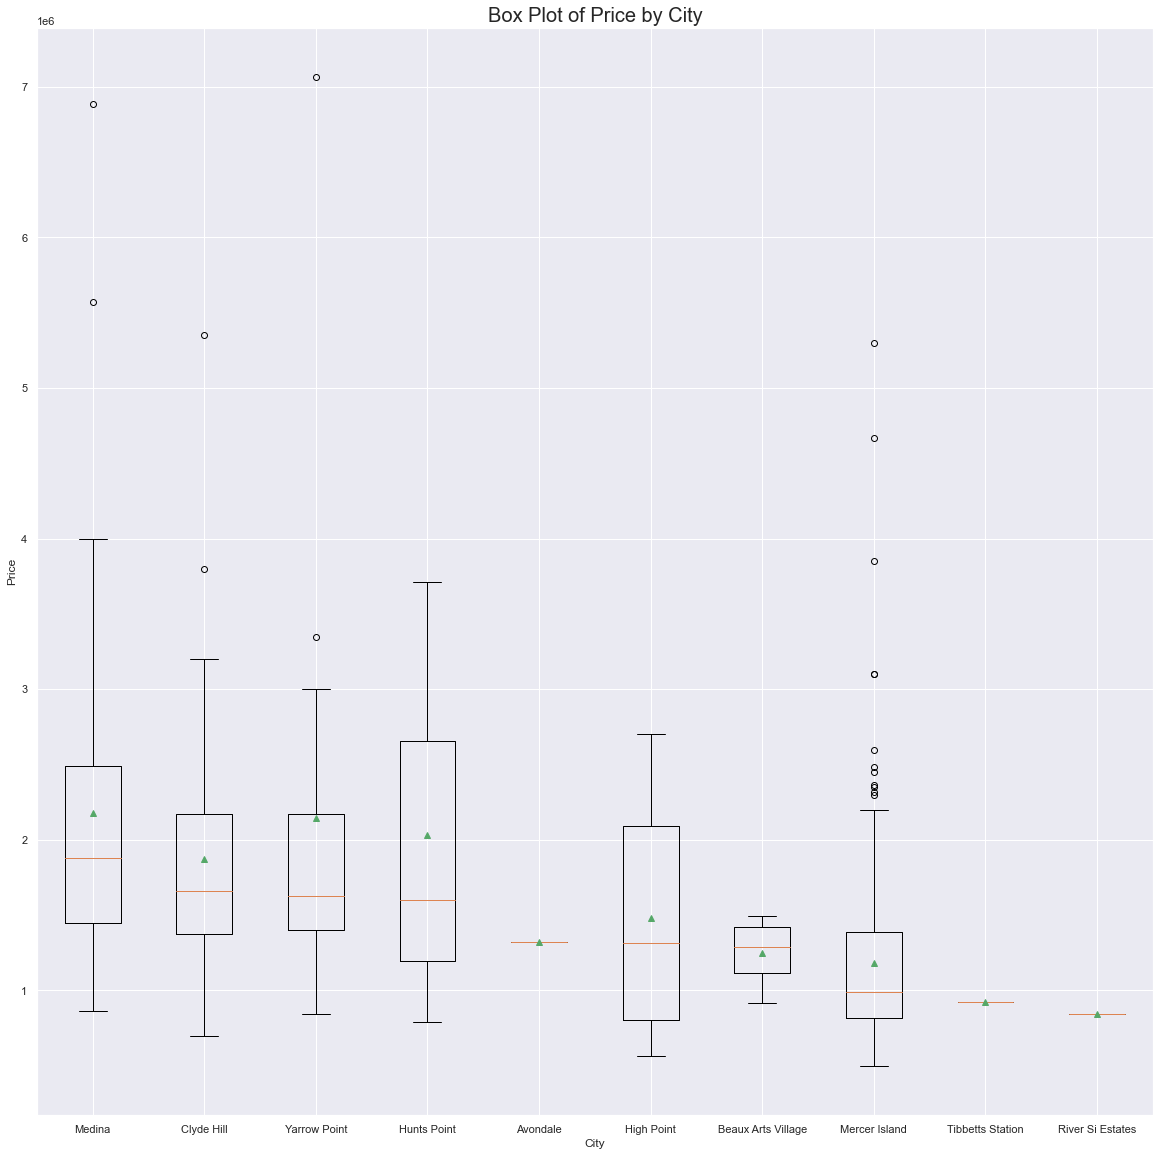

In [343]:
fig = plt.figure(figsize= (20, 20))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Price by City", fontsize= 20)
ax.set

data = [city_df['price'][city_df['city'] == 'Medina'],
        city_df['price'][city_df['city'] == 'Clyde Hill'],
        city_df['price'][city_df['city'] == 'Yarrow Point'],
        city_df['price'][city_df['city'] == 'Hunts Point'],
        city_df['price'][city_df['city'] == 'Avondale'],
        city_df['price'][city_df['city'] == 'High Point'],
        city_df['price'][city_df['city'] == 'Beaux Arts Village'],
        city_df['price'][city_df['city'] == 'Mercer Island'],
        city_df['price'][city_df['city'] == 'Tibbetts Station'],
        city_df['price'][city_df['city'] == 'River Si Estates']]

ax.boxplot(data,
           labels=['Medina', 'Clyde Hill', 'Yarrow Point',
                   'Hunts Point', 'Avondale', 'High Point',
                   'Beaux Arts Village', 'Mercer Island',
                   'Tibbetts Station', 'River Si Estates'],
           showmeans= True)

plt.xlabel("City")
plt.ylabel("Price")

plt.show()

In [299]:
city_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'geom', 'county', 'city',
       'lon_mod', 'lat_mod', 'lat_long', 'yr_renovated2', 'month', 'year',
       'sqft_living_lot', 'yrs_since_built', 'yrs_since_reno',
       'yrs_btwn_built_reno', 'property_age', 'has_basement', 'has_view',
       'grade_exp', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'zipcode#98119',
       'zipcode#98105', 'zipcode#98006', 'zipcode#98005', 'grade#1', 'grade#3',
       'grade#4', 'grade#5', 'grade#6', 'grade#7', 'grade#8', 'grade#9',
       'grade#10', 'grade#11', 'grade#12', 'grade#13', 'yrs_since_sold',
       'newly_built', 'charm'],
      dtype='object')

In [345]:
mlr_model = ols(formula='price~grade_exp+sqft_living+sqft_lot+property_age+newly_built+charm', data=city_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4376.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:43:48   Log-Likelihood:            -2.3838e+05
No. Observations:               17290   AIC:                         4.768e+05
Df Residuals:                   17283   BIC:                         4.768e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.064e+05   6577.870    -16.180      0.000   -1.19e+05   -9.35e+04
grade_exp        6.9117      0.122     56.523      0.000       6.672       7.151
sqft_living    238.6019      2.448     97.481      0.000     233.804     243.400
sqft_lot        -0.2646      0.043     -6.151      0.000      -0.349      -0.180
property_age  2538.5504     68.635     36.986      0.000    2404.018    2673.083
newly_built    9.45e+04   8285.108     11.406      0.000    7.83e+04    1.11e+05
charm         6.875e+04   2.01e+04      3.414      0.001    2.93e+04    1.08e+05
==============================================================================
Omnibus:                     9451.541   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305026.307
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      23.167   Cond. No.                     5.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [347]:
Xx = city_df[['sqft_living', 'year']]
yY = city_df['price']
model = sm.OLS(yY, Xx).fit()
predictions = model.predict(Xx)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                          4.438e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:52:07   Log-Likelihood:                     -2.4046e+05
No. Observations:               17290   AIC:                                  4.809e+05
Df Residuals:                   17288   BIC:                                  4.809e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   285.4729      2.193    130.167      0.000     281.174     289.772
year          -26.5401      2.478    -10.712      0.000     -31.397     -21.684
==============================================================================
Omnibus:                    12367.741   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507869.510
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.879   Cond. No.                         4.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [113]:
city_df.groupby('zipcode')['price'].mean().describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

In [114]:
city_df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
Name: price, dtype: float64

In [115]:
dummy_zip = pd.get_dummies(city_df['zipcode'], drop_first=False)
dummy_zip.reset_index(inplace=True)
dummy_zip = dummy_zip.add_prefix("{}#".format('zipcode'))
dummy_zip = dummy_zip[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040','zipcode#98119', 'zipcode#98105','zipcode#98006','zipcode#98005']]

In [116]:
city_df.drop('zipcode', axis=1, inplace=True)
city_df = city_df.join(dummy_zip)

In [117]:
dummy_grade = pd.get_dummies(city_df['grade'])
dummy_grade = dummy_grade.add_prefix("{}#".format('grade'))
city_df = city_df.join(dummy_grade)

In [118]:
city_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
0              0      1986             0  47.4388 -122.162           2390   
1           1070      1977             0  47.6784 -122.285           2370   
2              0      1997             0  47.5646 -122.129           3710   
3              0      1990             0  47.6995 -122.228           4050   
4              0      2004             0  47.6647 -122.083           2250   

   sqft_lot15              geom       county      city  lon_mod  lat_mod  ...  \
0        7700  47.4388,-122.162  King County  Fairwood -122.160  47.4375  ...   
1        6283  47.6784,-122.285  King County   Seattle -122.280  47.6775  ...   
2        9685  47.5646,-122.129  King County  Bellevue -122.130  47.5650  ...   
3       14226  47.6995,-122.228  King County  Kirkland -122.235  47.7000  ...   
4        4050  47.6647,-122.083  King County   Redmond -122.085  47.6625  ...   

  has_basement  has_view      grade_exp  zipcode#98004  zipcode#98102  \
0            0         0    2980.957987              0              0   
1            1         0    2980.957987              0              0   
2            0         1   59874.141715              0              0   
3            0         1  162754.791419              0              0   
4            0         0    8103.083928              0              0   

   zipcode#98109  zipcode#98112  zipcode#98039  zipcode#98040  zipcode#98119  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode#98105  zipcode#98006  zipcode#98005  grade#1  grade#3  grade#4  \
0              0              0              0        0        0        0   
1              0              0              0        0        0        0   
2              0              1              0        0        0        0   
3              0              0              0        0        0        0   
4              0              0              0        0        0        0   

   grade#5  grade#6  grade#7  grade#8  grade#9  grade#10  grade#11  grade#12  \
0        0        0        0        1        0         0         0         0   
1        0        0        0        1        0         0         0         0   
2        0        0        0        0        0         0         1         0   
3        0        0        0        0        0         0         0         1   
4        0        0        0        0        1         0         0         0   

   grade#13  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 59 columns]

In [119]:
# dummy_zip = dummy_zip[['zip#98039','zip#98004','zip#98040','zip#98112','zip#98102','zip#98109','zip#98119','zip#98105','zip#98006','zip#98005']]

In [120]:
# df['grade'].value_counts()

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [122]:
#your code here
city_df['yrs_since_sold'] = 2020 - city_df['year']

In [123]:
city_df['yrs_since_sold'].value_counts()

6    11703
5     5587
Name: yrs_since_sold, dtype: int64

In [124]:
city_df.groupby('yrs_since_sold')['price'].mean()

yrs_since_sold
5    539478.438518
6    541341.601299
Name: price, dtype: float64

In [125]:
city_df.corr().loc['yrs_since_sold','price']

0.0023341364213541344

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [126]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [127]:
# your code here
city_df['sqft_living_lot']= city_df['sqft_living']*city_df['sqft_lot']

In [128]:
city_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
0              0      1986             0  47.4388 -122.162           2390   
1           1070      1977             0  47.6784 -122.285           2370   
2              0      1997             0  47.5646 -122.129           3710   
3              0      1990             0  47.6995 -122.228           4050   
4              0      2004             0  47.6647 -122.083           2250   

   sqft_lot15              geom       county      city  lon_mod  lat_mod  ...  \
0        7700  47.4388,-122.162  King County  Fairwood -122.160  47.4375  ...   
1        6283  47.6784,-122.285  King County   Seattle -122.280  47.6775  ...   
2        9685  47.5646,-122.129  King County  Bellevue -122.130  47.5650  ...   
3       14226  47.6995,-122.228  King County  Kirkland -122.235  47.7000  ...   
4        4050  47.6647,-122.083  King County   Redmond -122.085  47.6625  ...   

  has_view      grade_exp  zipcode#98004  zipcode#98102  zipcode#98109  \
0        0    2980.957987              0              0              0   
1        0    2980.957987              0              0              0   
2        1   59874.141715              0              0              0   
3        1  162754.791419              0              0              0   
4        0    8103.083928              0              0              0   

   zipcode#98112  zipcode#98039  zipcode#98040  zipcode#98119  zipcode#98105  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode#98006  zipcode#98005  grade#1  grade#3  grade#4  grade#5  grade#6  \
0              0              0        0        0        0        0        0   
1              0              0        0        0        0        0        0   
2              1              0        0        0        0        0        0   
3              0              0        0        0        0        0        0   
4              0              0        0        0        0        0        0   

   grade#7  grade#8  grade#9  grade#10  grade#11  grade#12  grade#13  \
0        0        1        0         0         0         0         0   
1        0        1        0         0         0         0         0   
2        0        0        0         0         1         0         0   
3        0        0        0         0         0         1         0   
4        0        0        1         0         0         0         0   

   yrs_since_sold  
0               6  
1               6  
2               6  
3               5  
4               6  

[5 rows x 60 columns]

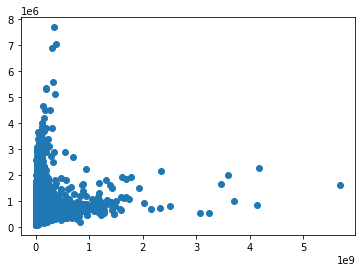

In [129]:
plt.scatter(city_df['sqft_living_lot'], city_df['price'])

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [130]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [131]:
city_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
0              0      1986             0  47.4388 -122.162           2390   
1           1070      1977             0  47.6784 -122.285           2370   
2              0      1997             0  47.5646 -122.129           3710   
3              0      1990             0  47.6995 -122.228           4050   
4              0      2004             0  47.6647 -122.083           2250   

   sqft_lot15              geom       county      city  lon_mod  lat_mod  ...  \
0        7700  47.4388,-122.162  King County  Fairwood -122.160  47.4375  ...   
1        6283  47.6784,-122.285  King County   Seattle -122.280  47.6775  ...   
2        9685  47.5646,-122.129  King County  Bellevue -122.130  47.5650  ...   
3       14226  47.6995,-122.228  King County  Kirkland -122.235  47.7000  ...   
4        4050  47.6647,-122.083  King County   Redmond -122.085  47.6625  ...   

  has_view      grade_exp  zipcode#98004  zipcode#98102  zipcode#98109  \
0        0    2980.957987              0              0              0   
1        0    2980.957987              0              0              0   
2        1   59874.141715              0              0              0   
3        1  162754.791419              0              0              0   
4        0    8103.083928              0              0              0   

   zipcode#98112  zipcode#98039  zipcode#98040  zipcode#98119  zipcode#98105  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode#98006  zipcode#98005  grade#1  grade#3  grade#4  grade#5  grade#6  \
0              0              0        0        0        0        0        0   
1              0              0        0        0        0        0        0   
2              1              0        0        0        0        0        0   
3              0              0        0        0        0        0        0   
4              0              0        0        0        0        0        0   

   grade#7  grade#8  grade#9  grade#10  grade#11  grade#12  grade#13  \
0        0        1        0         0         0         0         0   
1        0        1        0         0         0         0         0   
2        0        0        0         0         1         0         0   
3        0        0        0         0         0         1         0   
4        0        0        1         0         0         0         0   

   yrs_since_sold  
0               6  
1               6  
2               6  
3               5  
4               6  

[5 rows x 60 columns]

In [132]:
city_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'geom', 'county', 'city',
       'lon_mod', 'lat_mod', 'lat_long', 'yr_renovated2', 'month', 'year',
       'sqft_living_lot', 'yrs_since_built', 'yrs_since_reno',
       'yrs_btwn_built_reno', 'property_age', 'has_basement', 'has_view',
       'grade_exp', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'zipcode#98119',
       'zipcode#98105', 'zipcode#98006', 'zipcode#98005', 'grade#1', 'grade#3',
       'grade#4', 'grade#5', 'grade#6', 'grade#7', 'grade#8', 'grade#9',
       'grade#10', 'grade#11', 'grade#12', 'grade#13', 'yrs_since_sold'],
      dtype='object')

In [133]:
sample_features = ['bedrooms','sqft_living_lot','grade#11', 'grade#12', 
                   'grade#13','zipcode#98004', 'zipcode#98102', 'zipcode#98109', 
                   'zipcode#98112',]

In [134]:
#your code here 
main_features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
                 'floors', 'waterfront', 'view', 'condition', 'grade','grade_exp',
                 'has_basement','property_age' ,'zipcode#98004', 
                 'zipcode#98102', 'zipcode#98109', 'zipcode#98112','zipcode#98039',
                 'zipcode#98040', 'zipcode#98119', 'zipcode#98105', 'zipcode#98006',
                 'zipcode#98005']

In [135]:
features = main_features

In [136]:
len(features)

22

In [137]:
city_df[features].isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
grade_exp        0
has_basement     0
property_age     0
zipcode#98004    0
zipcode#98102    0
zipcode#98109    0
zipcode#98112    0
zipcode#98039    0
zipcode#98040    0
zipcode#98119    0
zipcode#98105    0
zipcode#98006    0
zipcode#98005    0
dtype: int64

In [138]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(city_df[features], city_df['price'], random_state=75,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 22) Target:  (13832,)
Training set - Features:  (3458, 22) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [140]:
#your code here 

In [141]:
scaler = StandardScaler()

#fit the scaler and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=city_df[features].columns)

### 5.3) Transform the testing set with the scaler.

In [142]:
#your code here 
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=city_df[features].columns)

### 5.4) Fit the model to the training data.

In [143]:
#your code here 

In [144]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 184861.95944579804


### 5.5) Use the model to predict on the training set and the test set.

In [145]:
#your code here 

In [146]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [147]:
#your code here 
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


Testing Root Mean Squared Error: 171187.7382414704


### 5.7) Determine if your model is overfit.

In [148]:
#your code here 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print ("R^2 Score:", lm.score(X_train, y_train))

Training:  184861 vs. Testing:  171187
R^2 Score: 0.7649952247628762


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


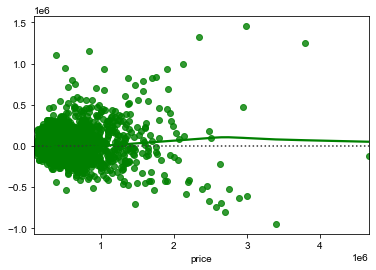

In [149]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")
sns.set(rc={'figure.figsize':(11.7,11.27)})

In [150]:
#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 664512.959675023


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

### Polynomial 2

In [151]:
# your code here - Polynomial-2

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(city_df[features])
poly2_columns = poly_2.get_feature_names(features)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       4.0       2.25       2070.0    8893.0     2.0         0.0   0.0   
1       5.0       3.00       2900.0    6730.0     1.0         0.0   0.0   
2       4.0       2.50       3770.0   10893.0     2.0         0.0   2.0   
3       3.0       3.50       4560.0   14608.0     2.0         0.0   2.0   
4       3.0       2.50       2550.0    5376.0     2.0         0.0   0.0   

   condition  grade      grade_exp  has_basement  property_age  zipcode#98004  \
0        4.0    8.0    2980.957987           0.0          28.0            0.0   
1        5.0    8.0    2980.957987           1.0          37.0            0.0   
2        3.0   11.0   59874.141715           0.0          17.0            0.0   
3        3.0   12.0  162754.791419           0.0          25.0            0.0   
4        3.0    9.0    8103.083928           0.0          10.0            0.0   

   zipcode#98102  zipcode#98109  zipcode#98112  zipcode#98039  zipcode#98040  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   zipcode#98119  zipcode#98105  zipcode#98006  zipcode#98005  bedrooms^2  \
0            0.0            0.0            0.0            0.0        16.0   
1            0.0            0.0            0.0            0.0        25.0   
2            0.0            0.0            1.0            0.0        16.0   
3            0.0            0.0            0.0            0.0         9.0   
4            0.0            0.0            0.0            0.0         9.0   

   bedrooms bathrooms  bedrooms sqft_living  ...  zipcode#98112 zipcode#98119  \
0                 9.0                8280.0  ...                          0.0   
1                15.0               14500.0  ...                          0.0   
2                10.0               15080.0  ...                          0.0   
3                10.5               13680.0  ...                          0.0   
4                 7.5                7650.0  ...                          0.0   

   zipcode#98112 zipcode#98105  zipcode#98112 zipcode#98006  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   zipcode#98112 zipcode#98005  zipcode#98039^2  zipcode#98039 zipcode#98040  \
0                          0.0              0.0                          0.0   
1                          0.0              0.0                          0.0   
2                          0.0              0.0                          0.0   
3                          0.0              0.0                          0.0   
4                          0.0              0.0                          0.0   

   zipcode#98039 zipcode#98119  zipcode#98039 zipcode#98105  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   zipcode#98039 zipcode#98006  zipcode#98039 zipcode#98005  zipcode#98040^2  \
0                          0.0                          0.0              0.0   
1                          0.0                          0.0              0.0   
2                          0.0                          0.0              0.0   
3                          0.0                          0.0              0.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, city_df['price'], random_state=75,test_size=0.2)

In [162]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 154365.536459833


In [163]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 170464.62701055256
Training:  154365 vs. Testing:  170464


### Kbest

In [164]:
X_train.shape

(13832, 275)

In [165]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x7fc0085f8488>)

In [166]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [167]:
list(removed_columns)

['condition',
 'property_age',
 'zipcode#98109',
 'zipcode#98005',
 'bedrooms zipcode#98005',
 'bathrooms zipcode#98005',
 'sqft_lot^2',
 'sqft_lot property_age',
 'sqft_lot zipcode#98005',
 'floors zipcode#98005',
 'waterfront zipcode#98102',
 'waterfront zipcode#98109',
 'waterfront zipcode#98112',
 'waterfront zipcode#98039',
 'waterfront zipcode#98119',
 'waterfront zipcode#98006',
 'waterfront zipcode#98005',
 'view zipcode#98005',
 'condition^2',
 'condition property_age',
 'condition zipcode#98005',
 'grade zipcode#98005',
 'grade_exp zipcode#98005',
 'has_basement zipcode#98109',
 'has_basement zipcode#98005',
 'property_age^2',
 'property_age zipcode#98109',
 'property_age zipcode#98005',
 'zipcode#98004 zipcode#98102',
 'zipcode#98004 zipcode#98109',
 'zipcode#98004 zipcode#98112',
 'zipcode#98004 zipcode#98039',
 'zipcode#98004 zipcode#98040',
 'zipcode#98004 zipcode#98119',
 'zipcode#98004 zipcode#98105',
 'zipcode#98004 zipcode#98006',
 'zipcode#98004 zipcode#98005',
 'zip

In [168]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade',
 'grade_exp',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms grade_exp',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms grade_exp',
 'bathrooms has_bas

In [169]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 155913.046386376
Testing Root Mean Squared Error: 172072.99061162805


In [170]:
# list(zip(selected_columns, lm_kbest.coef_))

In [171]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  170464.62701055256 
 KBest:    172072.99061162805 



### VIF

In [172]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


# [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
# vif["features"] = df[features].columns
# vif.round(1)

In [173]:
# vif.sort_values(by='VIF Factor', ascending=False)

### RFE

In [174]:
len(selected_columns)

200

In [175]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

Fitting estimator with 200 features.
Fitting estimator with 198 features.
Fitting estimator with 196 features.
Fitting estimator with 194 features.
Fitting estimator with 192 features.
Fitting estimator with 190 features.
Fitting estimator with 188 features.
Fitting estimator with 186 features.
Fitting estimator with 184 features.
Fitting estimator with 182 features.
Fitting estimator with 180 features.
Fitting estimator with 178 features.
Fitting estimator with 176 features.
Fitting estimator with 174 features.
Fitting estimator with 172 features.
Fitting estimator with 170 features.
Fitting estimator with 168 features.
Fitting estimator with 166 features.
Fitting estimator with 164 features.
Fitting estimator with 162 features.
Fitting estimator with 160 features.
Fitting estimator with 158 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [176]:
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]


In [177]:
list(removed_rfe)

['sqft_living',
 'sqft_lot',
 'grade_exp',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms grade_exp',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms grade_exp',
 'sqft_living^2',
 'sqft_living sqft_lot',
 'sqft_living floors',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living grade_exp',
 'sqft_living property_age',
 'sqft_lot floors',
 'sqft_lot waterfront',
 'sqft_lot view',
 'sqft_lot condition',
 'sqft_lot grade',
 'sqft_lot grade_exp',
 'sqft_lot has_basement',
 'sqft_lot zipcode#98004',
 'sqft_lot zipcode#98039',
 'sqft_lot zipcode#98040',
 'sqft_lot zipcode#98006',
 'floors grade_exp',
 'waterfront grade_exp',
 'view grade_exp',
 'condition grade_exp',
 'grade grade_exp',
 'grade_exp^2',
 'grade_exp has_basement',
 'grade_exp property_age',
 'grade_exp zipcode#98004',
 'grade_exp zipcode#98102',
 'grade_exp zipcode#98109',
 'grade_exp zipcode#98112',
 'grade_exp zipcode#98039',
 'grade_exp zipcode#98040',
 'grade_exp zipcode#98119',
 'grade_ex

In [178]:
print(len(list(selected_rfe)))
list(selected_rfe)

156


['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'grade',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98109',
 'bathrooms zipcode#98112',
 'bathrooms zipcode#98039',
 'bathrooms

In [179]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 158833.34835909214
Testing Root Mean Squared Error: 160432.35866811618


In [181]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  170464.62701055256 
 KBest:    172072.99061162805 
 RFE:      160432.35866811618


### Lasso

In [182]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)
# The larger the alpha, the higher the penalty and will push more coefficients down to zero.
#Lasso adds a penalty to large coefficient, so in order for a coefficient to be large, the benefit it adds to the model needs to outweigh that penalty in the loss function
#So a coef will only be big if it does well at predicting the dependent variable

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 110009.17991425142
Testing Error: 169855.23808774332


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165752807642747.4, tolerance: 201142293225.56476
  positive)


<AxesSubplot:title={'center':'Modal Coefficients'}>

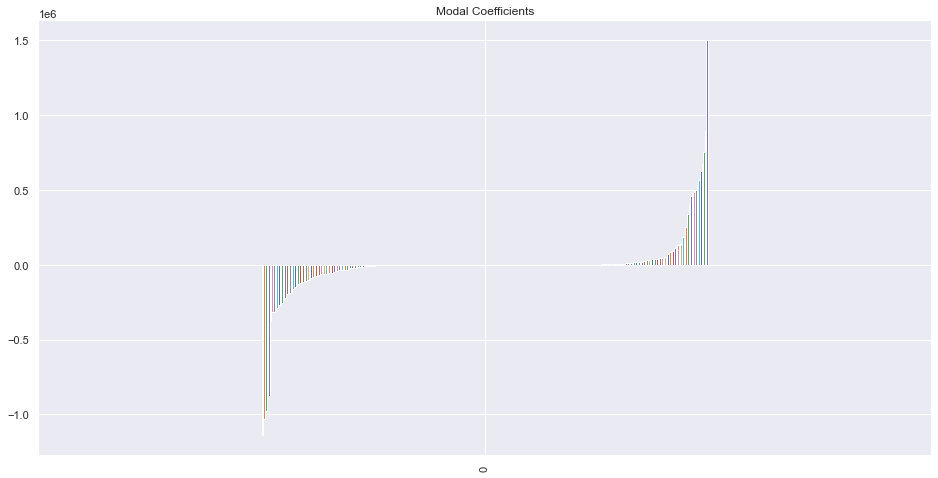

In [183]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [184]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    50
dtype: int64

In [185]:
coeff_df[coeff_df[0]==0]

0
zipcode#98112 zipcode#98006  0.0
waterfront zipcode#98112     0.0
zipcode#98039 zipcode#98040  0.0
zipcode#98006 zipcode#98005  0.0
waterfront zipcode#98005     0.0
zipcode#98112 zipcode#98005  0.0
zipcode#98040 zipcode#98005  0.0
zipcode#98039 zipcode#98119  0.0
zipcode#98039 zipcode#98105  0.0
zipcode#98039 zipcode#98006  0.0
zipcode#98039 zipcode#98005  0.0
zipcode#98040 zipcode#98119  0.0
zipcode#98040 zipcode#98105  0.0
zipcode#98040 zipcode#98006  0.0
waterfront zipcode#98119     0.0
waterfront zipcode#98109     0.0
zipcode#98119 zipcode#98105  0.0
zipcode#98112 zipcode#98105  0.0
zipcode#98102 zipcode#98109  0.0
zipcode#98102 zipcode#98112  0.0
zipcode#98102 zipcode#98039  0.0
zipcode#98102 zipcode#98040  0.0
zipcode#98102 zipcode#98119  0.0
zipcode#98102 zipcode#98105  0.0
waterfront zipcode#98102     0.0
zipcode#98102 zipcode#98006  0.0
zipcode#98109 zipcode#98112  0.0
zipcode#98109 zipcode#98006  0.0
zipcode#98109 zipcode#98039  0.0
zipcode#98109 zipcode#98040  0.0
zipcode#98109 zipcode#98105  0.0
zipcode#98109 zipcode#98119  0.0
zipcode#98102 zipcode#98005  0.0
zipcode#98004 zipcode#98005  0.0
zipcode#98119 zipcode#98006  0.0
zipcode#98004 zipcode#98105  0.0
zipcode#98112 zipcode#98119  0.0
zipcode#98112 zipcode#98040  0.0
zipcode#98112 zipcode#98039  0.0
zipcode#98105 zipcode#98006  0.0
zipcode#98109 zipcode#98005  0.0
zipcode#98105 zipcode#98005  0.0
zipcode#98119 zipcode#98005  0.0
zipcode#98004 zipcode#98102  0.0
zipcode#98004 zipcode#98109  0.0
zipcode#98004 zipcode#98006  0.0
zipcode#98004 zipcode#98040  0.0
zipcode#98004 zipcode#98112  0.0
zipcode#98004 zipcode#98039  0.0
zipcode#98004 zipcode#98119  0.0

In [186]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 170464.62701055256 
 KBest: 	 172072.99061162805 
 RFE: 	 	 160432.35866811618 
 Lasso 0.01: 	 169855.23808774332 



## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

In [187]:
final_scaler = StandardScaler()


#fit and transform the training data
df_final_scaled = pd.DataFrame(data=final_scaler.fit_transform(df_poly2[selected_rfe]), columns=selected_rfe)

In [188]:
df_final_scaled

bedrooms  bathrooms    floors  waterfront      view     grade  \
0      0.690062   0.179189  0.945804   -0.089698 -0.307685  0.294186   
1      1.786678   1.152641 -0.909850   -0.089698 -0.307685  0.294186   
2      0.690062   0.503673  0.945804   -0.089698  2.272272  2.848063   
3     -0.406553   1.801609  0.945804   -0.089698  2.272272  3.699356   
4     -0.406553   0.503673  0.945804   -0.089698 -0.307685  1.145478   
...         ...        ...       ...         ...       ...       ...   
17285  1.786678   0.503673 -0.909850   -0.089698  0.982294  0.294186   
17286 -1.503169  -0.469779  0.945804   -0.089698 -0.307685 -0.557107   
17287 -0.406553  -1.443231 -0.909850   -0.089698 -0.307685 -0.557107   
17288 -0.406553  -0.794263  0.017977   -0.089698 -0.307685 -0.557107   
17289 -0.406553  -0.794263 -0.909850   -0.089698 -0.307685 -0.557107   

       has_basement  zipcode#98004  zipcode#98102  zipcode#98112  \
0         -0.805717      -0.117889       -0.06818      -0.112476   
1          1.241131      -0.117889       -0.06818      -0.112476   
2         -0.805717      -0.117889       -0.06818      -0.112476   
3         -0.805717      -0.117889       -0.06818      -0.112476   
4         -0.805717      -0.117889       -0.06818      -0.112476   
...             ...            ...            ...            ...   
17285      1.241131      -0.117889       -0.06818      -0.112476   
17286     -0.805717      -0.117889       -0.06818      -0.112476   
17287     -0.805717      -0.117889       -0.06818      -0.112476   
17288      1.241131      -0.117889       -0.06818      -0.112476   
17289     -0.805717      -0.117889       -0.06818      -0.112476   

       zipcode#98039  zipcode#98040  zipcode#98119  zipcode#98105  \
0          -0.049346      -0.115855      -0.093234      -0.099649   
1          -0.049346      -0.115855      -0.093234      -0.099649   
2          -0.049346      -0.115855      -0.093234      -0.099649   
3          -0.049346      -0.115855      -0.093234      -0.099649   
4          -0.049346      -0.115855      -0.093234      -0.099649   
...              ...            ...            ...            ...   
17285      -0.049346      -0.115855      -0.093234      -0.099649   
17286      -0.049346      -0.115855      -0.093234      10.035232   
17287      -0.049346      -0.115855      -0.093234      -0.099649   
17288      -0.049346      -0.115855      -0.093234      -0.099649   
17289      -0.049346      -0.115855      -0.093234      -0.099649   

       zipcode#98006  bedrooms^2  bedrooms bathrooms  bedrooms floors  \
0          -0.150912    0.561072            0.358426         1.166689   
1          -0.150912    1.887625            1.779787        -0.045185   
2           6.626394    0.561072            0.595320         1.166689   
3          -0.150912   -0.470691            0.713767         0.358773   
4          -0.150912   -0.470691            0.003086         0.358773   
...              ...         ...                 ...              ...   
17285      -0.150912    1.887625            1.187553        -0.045185   
17286      -0.150912   -1.207665           -0.944488        -0.449144   
17287      -0.150912   -0.470691           -1.062934        -0.853102   
17288      -0.150912   -0.470691           -0.707594        -0.247164   
17289      -0.150912   -0.470691           -0.707594        -0.853102   

       bedrooms waterfront  bedrooms view  bedrooms condition  bedrooms grade  \
0                -0.085301      -0.293665            1.159010        0.623368   
1                -0.085301      -0.293665            3.477983        1.482226   
2                -0.085301       2.430295            0.128355        1.911655   
3                -0.085301       1.749305           -0.644636        1.052797   
4                -0.085301      -0.293665           -0.644636        0.086581   
...                    ...            ...                 ...             ...   
17285            -0.085301       1.408810           

In [189]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_rfe.fit(df_final_scaled, city_df['price'])

In [190]:
lm_final.score(df_final_scaled, city_df['price'])

0.8201658224955742

In [191]:
list(selected_rfe)

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'grade',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98109',
 'bathrooms zipcode#98112',
 'bathrooms zipcode#98039',
 'bathrooms

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [192]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [193]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(final_scaler, pickle_out)
pickle_out.close()

In [194]:
# with open("regression_model_rfe.pickle", "wb") as model:
#     pickle.dump(lm_final, model)

# with open("scalar_rfe.pickle", "wb") as transform:
#     pickle.dump(final_scalar, transform)

In [195]:
pd.DataFrame(selected_rfe).to_csv('selected_rfe.csv')

In [196]:
df_poly2.shape

(17290, 275)